En este documento realizamos un an√°lisis detallado de los ingresos presupuestarios percibidos en Brasil entre 2013 y 2021. Analizaremos los ingresos por categor√≠a econ√≥mica, por √≥rgano administrativo y temporalmente.

`Importante`

Dentro del an√°lisis tendremos que tener en cuenta que el valor registrado (valor lancado) y el valor recaudado (valor realizado) deber√≠an ser iguales, ya que lo que se registra contablemente debe ser igual a lo que se recibe finalmente contablemente. En caso de que se produzcan diferencias entre ambos valores para cada entrada, ser√° necesario observar las razones por las cuales se produce esta casu√≠stica. 

Indicamos a continuaci√≥n el significado de las columnas que contienen valores de ingresos:

- Previsi√≥n del ingreso (valor previsto atualizado): previsi√≥n del ingreso a recaudar
- Ingreso registrado (valor lancado): valor del ingreso registrado "contablemente".
- Ingreso recaudado (valor realizado): valor del ingreso recaudado finalmente. 
- Importe recaudado sobre la previsi√≥n (percentual realizado): porcentaje de la previsi√≥n recaudado finalmente. 

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from src import funciones_soporte as fs

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
datos_brasil = pd.read_pickle("datos/datos_brasil.pkl")
print(datos_brasil.shape)
datos_brasil.head(1)

(1026299, 16)


C√ìDIGO √ìRG√ÉO SUPERIOR       NOME √ìRG√ÉO SUPERIOR  C√ìDIGO √ìRG√ÉO  \
0                  63000  Advocacia-Geral da Uni√£o         63000   

                                          NOME √ìRG√ÉO  C√ìDIGO UNIDADE GESTORA  \
0  Advocacia-Geral da Uni√£o - Unidades com v√≠ncul...                  110060   

                            NOME UNIDADE GESTORA CATEGORIA ECON√îMICA  \
0  COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU  Receitas Correntes   

              ORIGEM RECEITA                                ESP√âCIE RECEITA  \
0  Outras Receitas Correntes  Bens, Direitos e Valores Incorporados ao Patr   

                                    DETALHAMENTO  VALOR PREVISTO ATUALIZADO  \
0  REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC                        0.0   

   VALOR LAN√áADO  VALOR REALIZADO  PERCENTUAL REALIZADO DATA LAN√áAMENTO  \
0            0.0          1297.13                   0.0      2013-12-31   

   ANO EXERC√çCIO  
0           2013

## *Evoluci√≥n temporal*

En este apartado nos encontraremos con un an√°lisis temporal de los ingresos. Revisaremos las diferencias entre los valores previstos y los recaudados finalmente, as√≠ como entre los ingresos registrados y los recaudados realmente. 

### *Previsiones y recaudacion*

In [4]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_prevision = datos_brasil.iloc[: ,[10, 12, 14]]
df_comp_recaudacion_prevision["A√±o"] = df_comp_recaudacion_prevision["DATA LAN√áAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_prevision

C:\Users\gabri\AppData\Local\Temp\ipykernel_16168\2635946192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_prevision["A√±o"] = df_comp_recaudacion_prevision["DATA LAN√áAMENTO"].dt.strftime("%Y")


VALOR PREVISTO ATUALIZADO  VALOR REALIZADO DATA LAN√áAMENTO   A√±o
0                             0.00         1,297.13      2013-12-31  2013
1                             0.00    26,666,621.42      2013-12-31  2013
2                             0.00       301,251.13      2013-12-31  2013
3                             0.00         1,855.58      2013-12-31  2013
4                             0.00        52,140.68      2013-12-31  2013
...                            ...              ...             ...   ...
1026294              16,940,891.00             0.00      2021-04-23  2021
1026295                       0.00           372.90      2021-11-22  2021
1026296                 200,000.00             0.00      2021-04-23  2021
1026297                       0.00     1,000,000.00      2021-05-10  2021
1026298                       0.00     1,000,000.00      2021-03-23  2021

[1026299 rows x 4 columns]

In [5]:
df_agrupado = df_comp_recaudacion_prevision.groupby("A√±o")[["VALOR PREVISTO ATUALIZADO","VALOR REALIZADO"]].sum()
df_agrupado["porcentaje_recaudacion"] = round((df_agrupado["VALOR REALIZADO"]/df_agrupado["VALOR PREVISTO ATUALIZADO"]) *100, 2)
df_agrupado

VALOR PREVISTO ATUALIZADO      VALOR REALIZADO  porcentaje_recaudacion
A√±o                                                                         
2013       2,174,650,946,322.04 1,893,613,719,099.78                   87.08
2014       2,392,129,226,119.23 2,238,551,079,327.88                   93.58
2015       2,878,827,555,613.92 2,665,685,375,159.13                   92.60
2016       2,952,696,248,075.54 2,839,711,583,462.82                   96.17
2017       3,414,379,614,681.84 2,558,047,412,866.96                   74.92
2018       3,505,648,331,810.28 2,942,387,872,873.97                   83.93
2019       3,261,378,698,948.11 2,991,564,738,258.26                   91.73
2020       3,577,146,718,910.25 3,631,448,629,524.17                  101.52
2021       4,180,716,471,387.52 3,876,372,024,873.04                   92.72

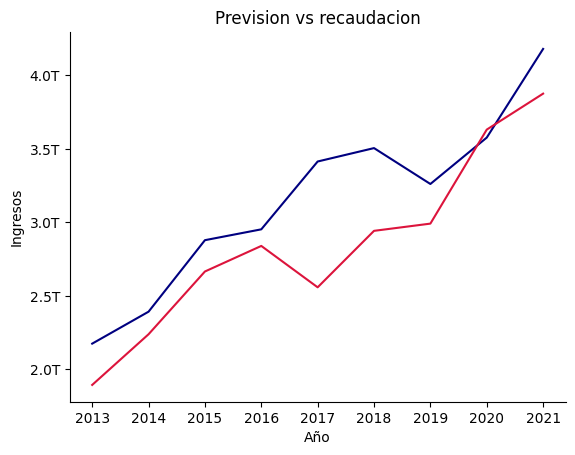

In [6]:
fs.evolucion_temporal(df_agrupado, "A√±o", ["VALOR PREVISTO ATUALIZADO", "VALOR REALIZADO"])

Como podemos ver en ambos gr√°ficos tanto la previsi√≥n, como la recaudaci√≥n real de los ingresos p√∫blicos de Brasil presentan una tendencia al alza a lo largo de los a√±os. A√∫n as√≠ observamos que la recaudaci√≥n anual presenta valores inferiores en todos los a√±os a la previsi√≥n recaudada. Principalmente vemos una importante reducci√≥n en la recaudaci√≥n anual en 2017, a√±o en el cual se esperaba ingresar un total de 3.414.379.614.681,84 $, de los cuales se ingresaron solo un 74,92 %. Esto puede deberse a la crisis econ√≥mica que sufri√≥ el pa√≠s entre 2015 y 2016. 

### *Ingresos registrados e ingresos recaudados*

In [6]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_registro = datos_brasil.iloc[: ,[11, 12, 14]]
df_comp_recaudacion_registro["A√±o"] = df_comp_recaudacion_registro["DATA LAN√áAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_registro

C:\Users\gabri\AppData\Local\Temp\ipykernel_16168\2262978967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_registro["A√±o"] = df_comp_recaudacion_registro["DATA LAN√áAMENTO"].dt.strftime("%Y")


VALOR LAN√áADO  VALOR REALIZADO DATA LAN√áAMENTO   A√±o
0                 0.00         1,297.13      2013-12-31  2013
1                 0.00    26,666,621.42      2013-12-31  2013
2                 0.00       301,251.13      2013-12-31  2013
3                 0.00         1,855.58      2013-12-31  2013
4                 0.00        52,140.68      2013-12-31  2013
...                ...              ...             ...   ...
1026294           0.00             0.00      2021-04-23  2021
1026295           0.00           372.90      2021-11-22  2021
1026296           0.00             0.00      2021-04-23  2021
1026297           0.00     1,000,000.00      2021-05-10  2021
1026298           0.00     1,000,000.00      2021-03-23  2021

[1026299 rows x 4 columns]

In [7]:
df_agrupado2 = df_comp_recaudacion_registro.groupby("A√±o")[["VALOR LAN√áADO","VALOR REALIZADO"]].sum()
df_agrupado2["diferencia recaudacion"] = df_agrupado2["VALOR LAN√áADO"] - df_agrupado2["VALOR REALIZADO"]
df_agrupado2

VALOR LAN√áADO      VALOR REALIZADO  diferencia recaudacion
A√±o                                                                   
2013 1,142,556,841,623.94 1,893,613,719,099.78     -751,056,877,475.84
2014 1,266,561,021,071.51 2,238,551,079,327.88     -971,990,058,256.37
2015   307,296,621,471.69 2,665,685,375,159.13   -2,358,388,753,687.44
2016    18,651,606,918.55 2,839,711,583,462.82   -2,821,059,976,544.27
2017   133,949,259,691.54 2,558,047,412,866.96   -2,424,098,153,175.42
2018     8,523,696,496.37 2,942,387,872,873.97   -2,933,864,176,377.60
2019  -124,684,806,683.59 2,991,564,738,258.26   -3,116,249,544,941.85
2020    35,589,145,007.15 3,631,448,629,524.17   -3,595,859,484,517.02
2021    -6,336,662,253.18 3,876,372,024,873.04   -3,882,708,687,126.22

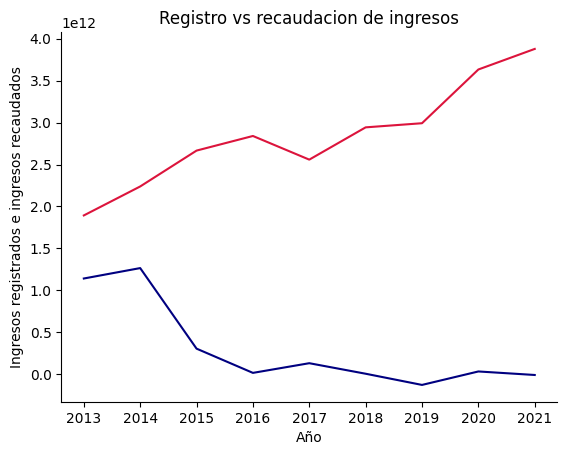

In [9]:
fs.evolucion_temporal(df_agrupado2, "A√±o", ["VALOR LAN√áADO", "VALOR REALIZADO"])

En cuanto a los registros de ingresos, y la recaudaci√≥n real observamos enormes diferencias. Como hemos comentado anteriormente, el registro de un ingreso contable debe ser igual al ingreso final recibido por la entidad recaudadora. En este caso no se cumple este principio. Vemos que durante todo el per√≠odo analizado el resgitro de ingresos presenta una tendencia a la baja, mientras que los ingresos realmente recaudados presentan una tendencia al alza. Se est√°n registrando menos ingresos de los que se est√°n recuadando realmente. M√°s abajo observaremos qu√© entidades administrativas presentan mayores diferencias en este aspecto, ya que intuimos la existencia de fraude p√∫bliico.

## *Ingresos por categor√≠a econ√≥mica*

Como hemos visto anteriormente los ingresos de Brasil entre 2013 y 2021 se clasifican en diferentes categor√≠as y subcategor√≠as econ√≥micas. A continuaci√≥n realizaremos un an√°lisis de los ingresos recibidos por categor√≠a y despu√©s de las subcategor√≠as que contienen las categor√≠as principales. 

Las categor√≠as econ√≥micas principales en las que se dividen los ingresos de Brasil son:
- Ingresos corrientes
- Ingresos de capital
- Ingresos corrientes - intrapresupuestarios	
- Ingresos de capital - intrapresupuestarios

Vamos a ir viendo el desglose de los ingresos por categor√≠a eco√≥mica.

In [8]:
# Ingresos por categor√≠a econ√≥mica general
categorias_economicas = fs.info_cat(datos_brasil, "CATEGORIA ECON√îMICA").reset_index()
categorias_economicas

CATEGORIA ECON√îMICA  VALOR PREVISTO ATUALIZADO  \
0                         Receitas Correntes      13,549,526,943,206.14   
1   Receitas Correntes - intra-or√ßament√°rias         291,485,025,919.00   
2                        Receitas de Capital      14,485,753,431,206.59   
3  Receitas de Capital - intra-or√ßament√°rias          10,808,411,537.00   
4                             Sem informa√ß√£o                       0.00   

         VALOR LAN√áADO       VALOR REALIZADO porcentaje recaudado  \
0 5,377,870,503,243.72 12,909,343,128,909.43                95.28   
1                 0.00    292,651,790,699.89               100.40   
2         3,813,949.42 12,407,136,680,065.79                85.65   
3                 0.00     28,250,835,724.33               261.38   
4     2,812,347,576.39                 46.57       Previsi√≥n de 0   

   diferencia_recaudacion  
0    7,531,472,625,665.71  
1      292,651,790,699.89  
2   12,407,132,866,116.37  
3       28,250,835,724.33  
4       -2,812,347,529.82

Al adentrarnos en las categor√≠as econ√≥micas podemos observar diferencias entre los diferentes valores de ingresos. La categor√≠a que m√°s ingresos ha recaudado entre 2013 y 2021 ha sido la de ingresos de capital, seguida por los ingresos corrientes. Estas categor√≠as contienen al fin y al cabo la mayor√≠a de los ingresos presupuestarios. Los ingresos intrapresupuestarios tienen una inferior recaudaci√≥n. Finalmente tenemos las entradas sin informaci√≥n. 

En cuanto a las previsiones, las categor√≠as con mayor volumen de previsi√≥n son asimismo las de inrgesos corriente y de capital, seguidas de los ingresos intrapresupuestarios. De las previsiones, las categor√≠as que han llegado a recaudar la totalidad o m√°s de lo previsto han sido las intrapresupuestarias. Los ingresos corriente y de capital han consguido entre un 80% y un 90% de la recaudaci√≥n prevista. 

Finalmente, las categor√≠as con m√°s diferencia entre los ingresos registrados y los ingresos recaudados son las intrapresupuestarias, las cuales tienen un ingreso registrado de 0 $. Los ingresos de capital presentan una alta diferencia asimismo, ya que hay un registro bastante peque√±o de estos ingresos. Los ingresos corrientes son los que menos diferencia presentan.

In [9]:
cat_ec2 =categorias_economicas[categorias_economicas["CATEGORIA ECON√îMICA"] != "Sem informa√ß√£o"]

A continuaci√≥n podemos ver de forma detallada, como en un balance, las partidas correspondientes a cada categor√≠a econ√≥mica.

In [10]:
ingresos_cat = datos_brasil.groupby(["CATEGORIA ECON√îMICA", "ORIGEM RECEITA"])[["VALOR PREVISTO ATUALIZADO", "VALOR LAN√áADO","VALOR REALIZADO"]].sum().round(2)
ingresos_cat

VALOR PREVISTO ATUALIZADO  \
CATEGORIA ECON√îMICA                       ORIGEM RECEITA                                                           
Receitas Correntes                        Contribui√ß√µes                                     7,224,633,087,504.00   
                                          Impostos, Taxas e Contribui√ß√µes de Melhoria       4,510,202,085,939.00   
                                          Outras Receitas Correntes                           428,858,259,677.00   
                                          Receita Agropecu√°ria                                    230,056,327.00   
                                          Receita Industrial                                   18,734,738,626.00   
                                          Receita Patrimonial                                 922,303,174,656.03   
                                          Receita de Servi√ßos                                 439,803,742,964.11   
                                          Receitas Correntes - a classificar                                0.00   
                                          Transfer√™ncias Correntes                              4,761,797,513.00   
Receitas Correntes - intra-or√ßament√°rias  Contribui√ß√µes                                       190,615,572,904.00   
                                          Impostos, Taxas e Contribui√ß√µes de Melhoria               8,679,239.00   
                                          Outras Receitas Correntes                            98,478,861,468.00   
                                          Receita Industrial                                    1,381,739,049.00   
                                          Receita Patrimonial                                      45,380,166.00   
                                          Receita de Servi√ßos                                     954,793,093.00   
Receitas de Capital                       Aliena√ß√£o de Bens                                    69,459,904,322.00   
                                          Amortiza√ß√µes de Empr√©stimos                         468,392,937,016.00   
                                          Opera√ß√µes de Cr√©dito                             12,776,862,878,819.19   
                                          Outras Receitas de Capital                        1,169,948,076,486.00   
                                          Transfer√™ncias de Capital                             1,089,634,563.40   
Receitas de Capital - intra-or√ßament√°rias Aliena√ß√£o de Bens                                                 0.00   
                                          Opera√ß√µes de Cr√©dito                                 10,808,411,537.00   
Sem informa√ß√£o                            Sem informa√ß√£o                                                    0.00   

                                                                                             VALOR LAN√áADO  \
CATEGORIA ECON√îMICA                       ORIGEM RECEITA                                                     
Receitas Correntes                        Contribui√ß√µes                               3,220,620,507,720.18   
                                          Impostos, Taxas e Contribui√ß√µes de Melhoria 2,020,808,903,486.62   
                                          Outras Receitas Correntes                     136,055,962,948.35   
                                          Receita Agropecu√°ria                                        0.00   
                                          Receita Industrial                                          0.00   
                                          Receita Patrimonial                               380,086,767.00   
                                          Receita de Servi√ßos                                         0.00   
                                          Receitas Correntes - a classificar                  5,042,321.57   
                                          T

Realizaremos un an√°lisis en detalle de los origenes de los ingresos dentro de cada categor√≠a econ√≥mica.

### *Ingresos corrientes*

Como hemos visto en la preview del balance anterior, los ingresos corrientes se componen de los siguientes or√≠genes:

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
# Ingresos corrientes
ingresos_corrientes2 = datos_brasil[datos_brasil["CATEGORIA ECON√îMICA"] == "Receitas Correntes"]
ingresos_corrientes_origen = fs.info_cat(ingresos_corrientes2, "ORIGEM RECEITA").reset_index()
ingresos_corrientes_origen

ORIGEM RECEITA  VALOR PREVISTO ATUALIZADO  \
0                                Contribui√ß√µes       7,224,633,087,504.00   
1  Impostos, Taxas e Contribui√ß√µes de Melhoria       4,510,202,085,939.00   
2                    Outras Receitas Correntes         428,858,259,677.00   
3                         Receita Agropecu√°ria             230,056,327.00   
4                           Receita Industrial          18,734,738,626.00   
5                          Receita Patrimonial         922,303,174,656.03   
6                          Receita de Servi√ßos         439,803,742,964.11   
7           Receitas Correntes - a classificar                       0.00   
8                     Transfer√™ncias Correntes           4,761,797,513.00   

         VALOR LAN√áADO      VALOR REALIZADO porcentaje recaudado  \
0 3,220,620,507,720.18 6,877,089,890,534.66                95.19   
1 2,020,808,903,486.62 4,287,304,858,124.57                95.06   
2   136,055,962,948.35   371,983,192,854.63                86.74   
3                 0.00       212,916,430.85                92.55   
4                 0.00    17,941,345,587.65                95.77   
5       380,086,767.00   957,242,133,633.19               103.79   
6                 0.00   409,260,662,661.21                93.06   
7         5,042,321.57   -15,471,989,712.32       Previsi√≥n de 0   
8                 0.00     3,780,118,794.99                79.38   

   diferencia_recaudacion  
0    3,656,469,382,814.48  
1    2,266,495,954,637.95  
2      235,927,229,906.28  
3          212,916,430.85  
4       17,941,345,587.65  
5      956,862,046,866.19  
6      409,260,662,661.21  
7      -15,477,032,033.89  
8        3,780,118,794.99

Graficamos los ingresos corrientes

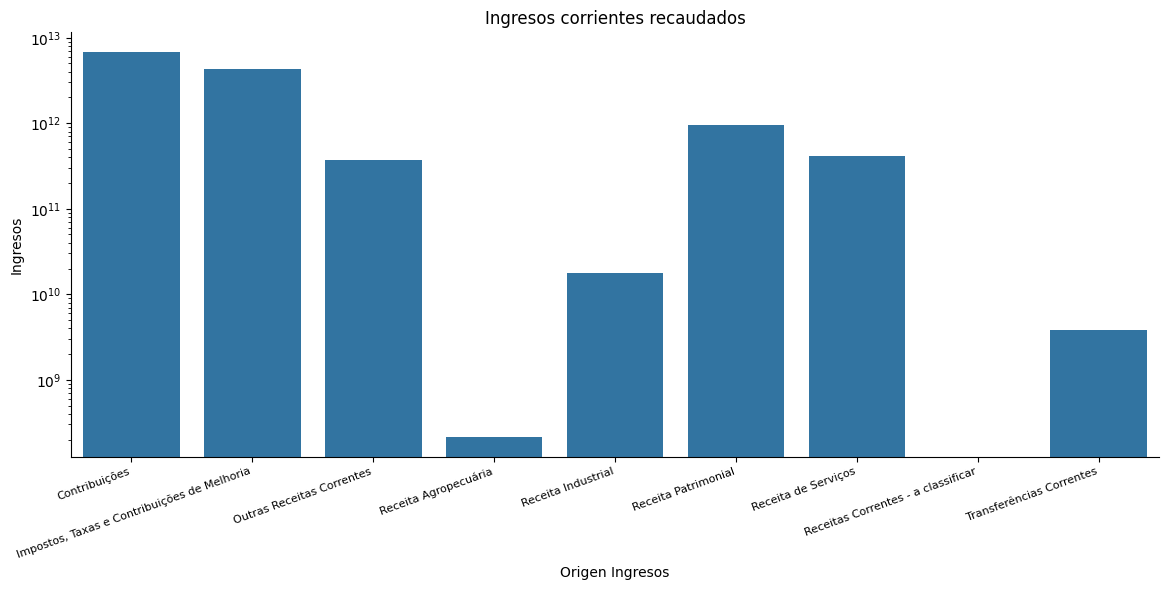

In [9]:
fs.grafico_cat_economia(ingresos_corrientes_origen, "ORIGEM RECEITA", "VALOR REALIZADO")

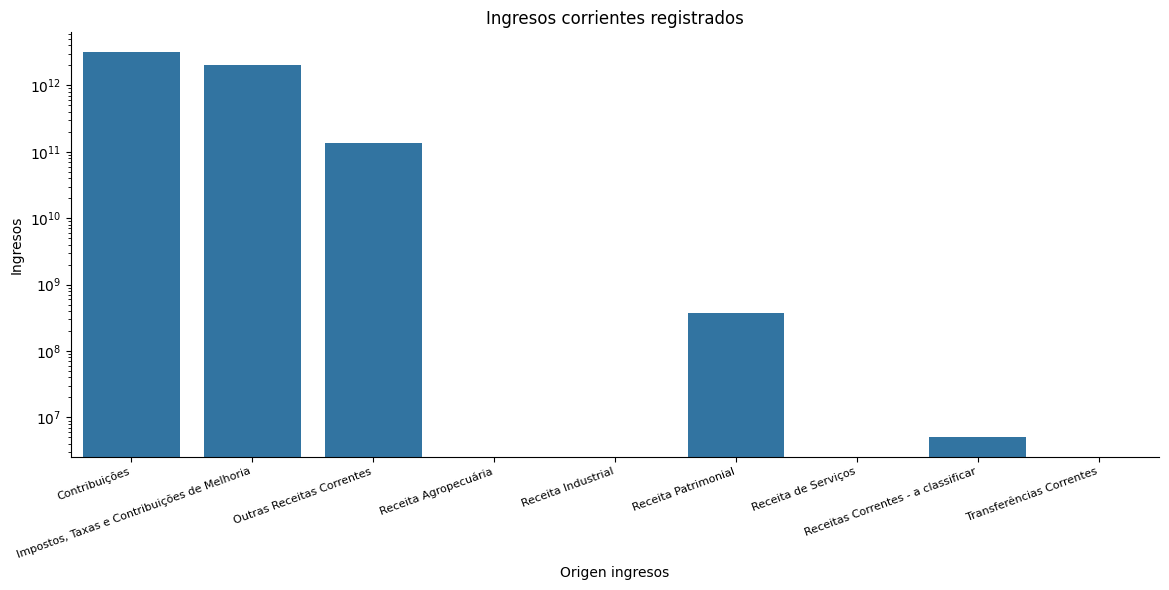

In [13]:
fs.grafico_cat_economia(ingresos_corrientes_origen, "ORIGEM RECEITA", "VALOR LAN√áADO")

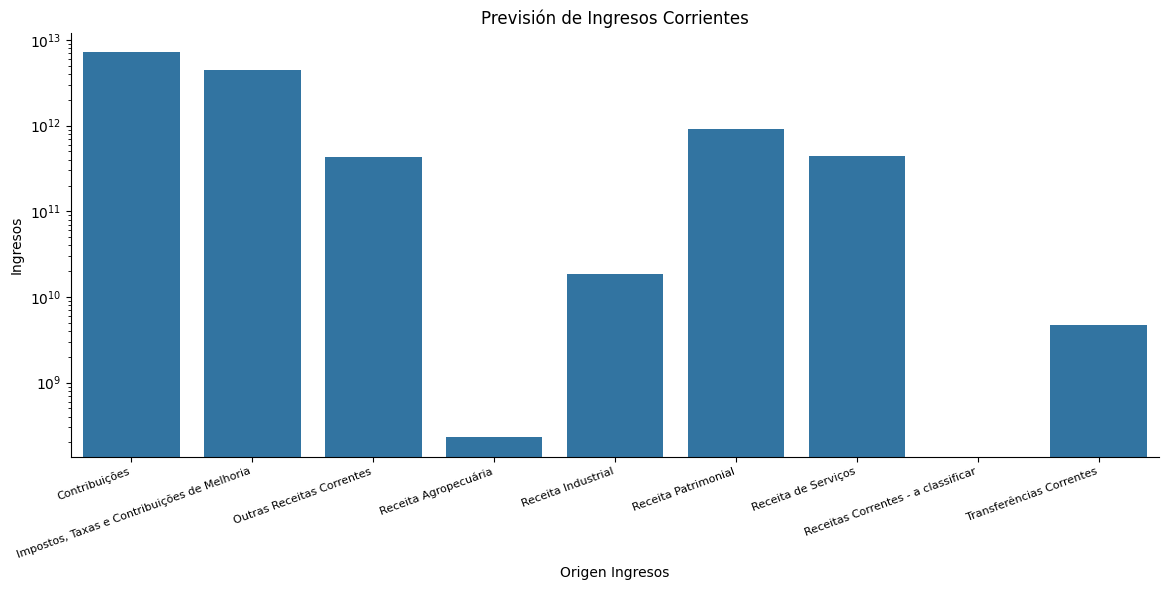

In [14]:
fs.grafico_cat_economia(ingresos_corrientes_origen, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

Dentro de los ingresos corrientes nos encontramos que la principal fuente de estos ingresos son las contribuciones y los ingresos fiscales, los cuales se componen por los impuestos, tasas y contribuciones de mejor√≠a. Estas dos categor√≠as son asimismo las que han recibido una mayor previsi√≥n de ingresos. Al fin y al cabo se componen de los ingresos procedentes de la recudaci√≥n de impuestos, tasa y contribuciones, as√≠ como de las contribuciones sociales. Estos son los principales ingresos de una econom√≠a por norma general. Como es de esperar, la mayor diferencia entre lo recaudado y lo registrado es superior en estas categor√≠as. 

Los or√≠genes con menor volumen de ingresos son las rentas agrarias, las cuales proceden de la actividad o explotaci√≥n agraria de origen vegetal o animal.La previsi√≥n de estsos ingresos es bastante baja asimismo. 

Nos encontramos que hay un registro nulo en las rentas agropecuarias, las rentas industriales, y las rentas de servicios. 

In [17]:
negativos_corrientes = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Receitas Correntes - a classificar"]
neg = negativos_corrientes[negativos_corrientes["VALOR REALIZADO"] < 0]
neg.head(2)

C√ìDIGO √ìRG√ÉO SUPERIOR                 NOME √ìRG√ÉO SUPERIOR  C√ìDIGO √ìRG√ÉO  \
3800                  35000  Minist√©rio das Rela√ß√µes Exteriores         35000   
8323                  35000  Minist√©rio das Rela√ß√µes Exteriores         35000   

                                             NOME √ìRG√ÉO  \
3800  Minist√©rio das Rela√ß√µes Exteriores - Unidades ...   
8323  Minist√©rio das Rela√ß√µes Exteriores - Unidades ...   

      C√ìDIGO UNIDADE GESTORA     NOME UNIDADE GESTORA CATEGORIA ECON√îMICA  \
3800                  240999  MRE - DIFERENCA CAMBIAL  Receitas Correntes   
8323                  240999  MRE - DIFERENCA CAMBIAL  Receitas Correntes   

                          ORIGEM RECEITA                     ESP√âCIE RECEITA  \
3800  Receitas Correntes - a classificar  Receitas Correntes - a classificar   
8323  Receitas Correntes - a classificar  Receitas Correntes - a classificar   

                            DETALHAMENTO  VALOR PREVISTO ATUALIZADO  \
3800  Receitas Correntes - a classificar                       0.00   
8323  Receitas Correntes - a classificar                       0.00   

      VALOR LAN√áADO  VALOR REALIZADO  PERCENTUAL REALIZADO DATA LAN√áAMENTO  \
3800           0.00      -131,512.98                  0.00      2013-12-31   
8323           0.00       -59,521.93                  0.00      2014-12-31   

      ANO EXERC√çCIO  
3800           2013  
8323           2014

#### *Ingresos corrientes - intrapresupuestarios*

In [3]:
ingresos_corrientes_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECON√îMICA"] == "Receitas Correntes - intra-or√ßament√°rias"]
fs.info_cat(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA")

VALOR PREVISTO ATUALIZADO  \
ORIGEM RECEITA                                                           
Contribui√ß√µes                                             1.906156e+11   
Impostos, Taxas e Contribui√ß√µes de Melhoria               8.679239e+06   
Outras Receitas Correntes                                 9.847886e+10   
Receita Industrial                                        1.381739e+09   
Receita Patrimonial                                       4.538017e+07   
Receita de Servi√ßos                                       9.547931e+08   

                                             VALOR LAN√áADO  VALOR REALIZADO  \
ORIGEM RECEITA                                                                
Contribui√ß√µes                                          0.0     1.665143e+11   
Impostos, Taxas e Contribui√ß√µes de Melhoria            0.0    -1.214788e+07   
Outras Receitas Correntes                              0.0     1.235927e+11   
Receita Industrial                                     0.0     1.314822e+09   
Receita Patrimonial                                    0.0     9.274581e+07   
Receita de Servi√ßos                                    0.0     1.149372e+09   

                                             porcentaje recaudado  \
ORIGEM RECEITA                                                      
Contribui√ß√µes                                               87.36   
Impostos, Taxas e Contribui√ß√µes de Melhoria               -139.96   
Outras Receitas Correntes                                  125.50   
Receita Industrial                                          95.16   
Receita Patrimonial                                        204.38   
Receita de Servi√ßos                                        120.38   

                                             diferencia_recaudacion  
ORIGEM RECEITA                                                       
Contribui√ß√µes                                          1.665143e+11  
Impostos, Taxas e Contribui√ß√µes de Melhoria           -1.214788e+07  
Outras Receitas Correntes                              1.235927e+11  
Receita Industrial                                     1.314822e+09  
Receita Patrimonial                                    9.274581e+07  
Receita de Servi√ßos                                    1.149372e+09

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


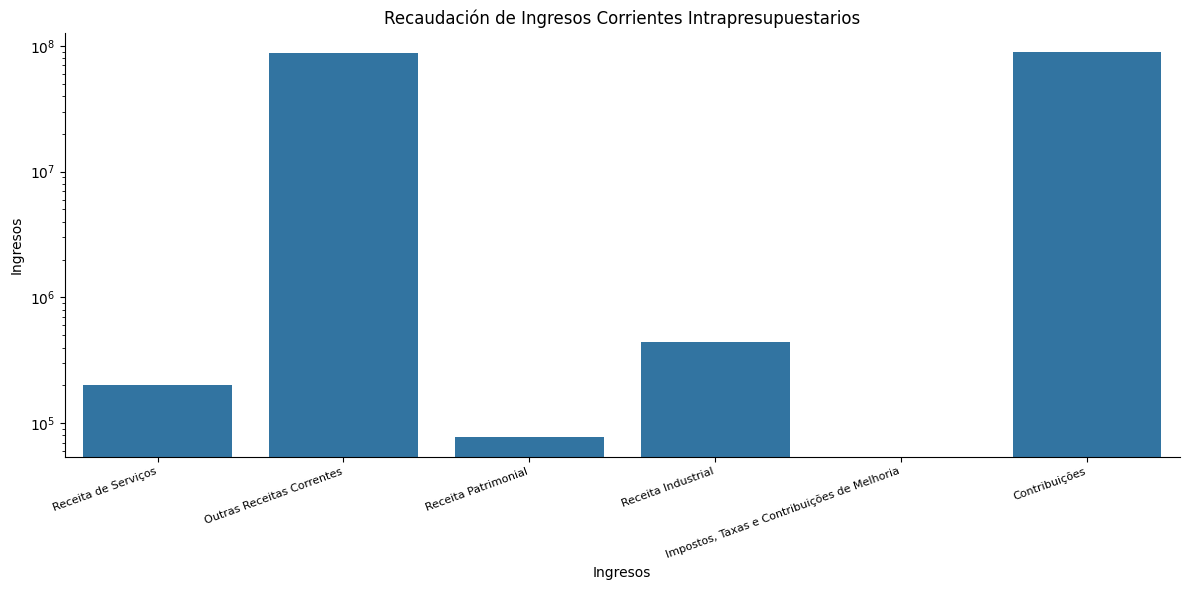

In [4]:
fs.grafico_cat_economia(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA", "VALOR REALIZADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


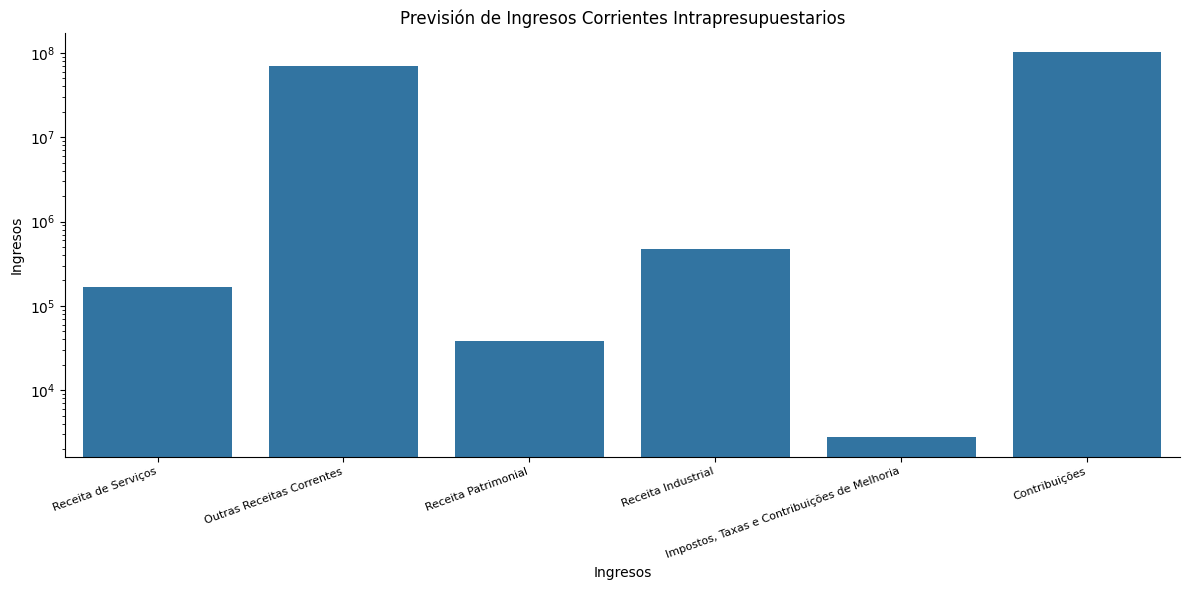

In [5]:
fs.grafico_cat_economia(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

#### *Ingresos de capital*

In [6]:
ingresos_capital = datos_brasil[datos_brasil["CATEGORIA ECON√îMICA"] == "Receitas de Capital"]
fs.info_cat(ingresos_capital, "ORIGEM RECEITA")

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
ORIGEM RECEITA                                                          
Aliena√ß√£o de Bens                         6.945990e+10           0.00   
Amortiza√ß√µes de Empr√©stimos               4.683929e+11           0.00   
Opera√ß√µes de Cr√©dito                      1.277686e+13     3813949.42   
Outras Receitas de Capital                1.169948e+12           0.00   
Transfer√™ncias de Capital                 1.089635e+09           0.00   

                             VALOR REALIZADO  porcentaje recaudado  \
ORIGEM RECEITA                                                       
Aliena√ß√£o de Bens               2.692501e+10                 38.76   
Amortiza√ß√µes de Empr√©stimos     7.990345e+11                170.59   
Opera√ß√µes de Cr√©dito            9.857798e+12                 77.15   
Outras Receitas de Capital      1.722901e+12                147.26   
Transfer√™ncias de Capital       4.786975e+08                 43.93   

                             diferencia_recaudacion  
ORIGEM RECEITA                                       
Aliena√ß√£o de Bens                      2.692501e+10  
Amortiza√ß√µes de Empr√©stimos            7.990345e+11  
Opera√ß√µes de Cr√©dito                   9.857794e+12  
Outras Receitas de Capital             1.722901e+12  
Transfer√™ncias de Capital              4.786975e+08

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


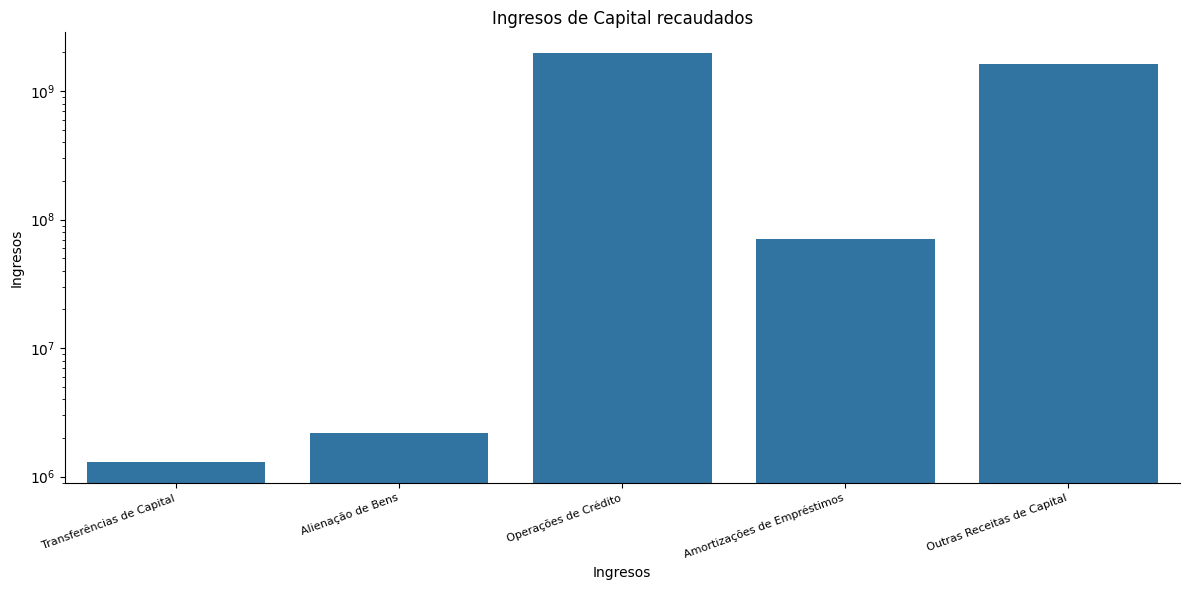

In [7]:
fs.grafico_cat_economia(ingresos_capital, "ORIGEM RECEITA", "VALOR REALIZADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


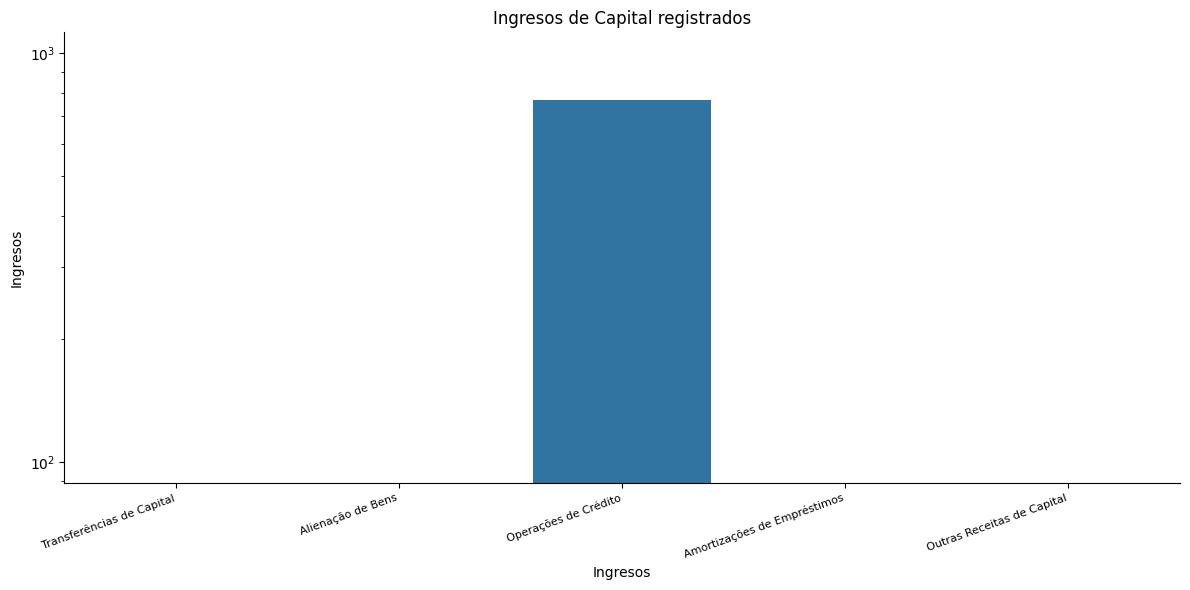

In [8]:
fs.grafico_cat_economia(ingresos_capital, "ORIGEM RECEITA", "VALOR LAN√áADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


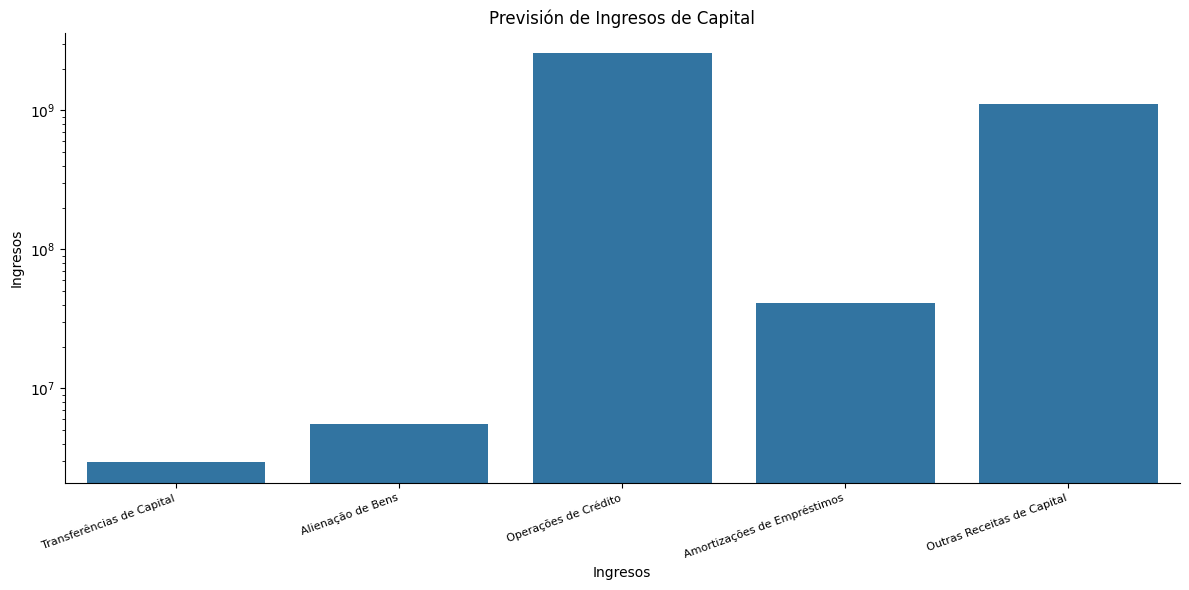

In [9]:
fs.grafico_cat_economia(ingresos_capital, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

#### *Ingresos de capital - intrapresupuestarios*

In [10]:
ingresos_capital_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECON√îMICA"] == "Receitas de Capital - intra-or√ßament√°rias"]
fs.info_cat(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA")

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
ORIGEM RECEITA                                                   
Aliena√ß√£o de Bens                  0.000000e+00            0.0   
Opera√ß√µes de Cr√©dito               1.080841e+10            0.0   

                      VALOR REALIZADO porcentaje recaudado  \
ORIGEM RECEITA                                               
Aliena√ß√£o de Bens        1.088867e+08       Previsi√≥n de 0   
Opera√ß√µes de Cr√©dito     2.814195e+10               260.37   

                      diferencia_recaudacion  
ORIGEM RECEITA                                
Aliena√ß√£o de Bens               1.088867e+08  
Opera√ß√µes de Cr√©dito            2.814195e+10

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


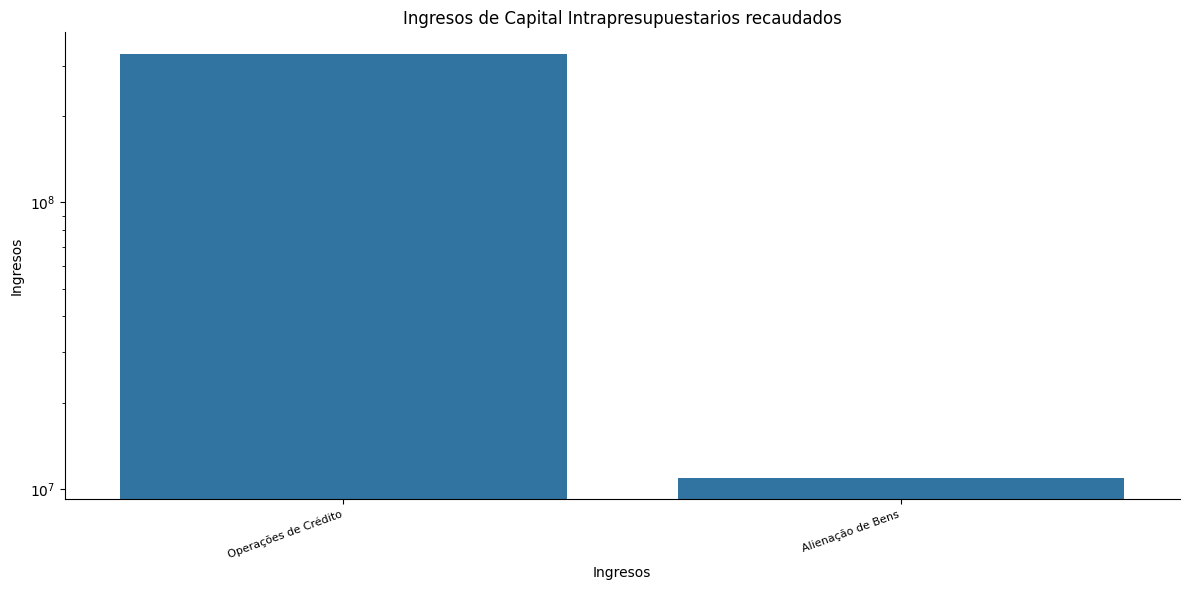

In [11]:
fs.grafico_cat_economia(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA", "VALOR REALIZADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


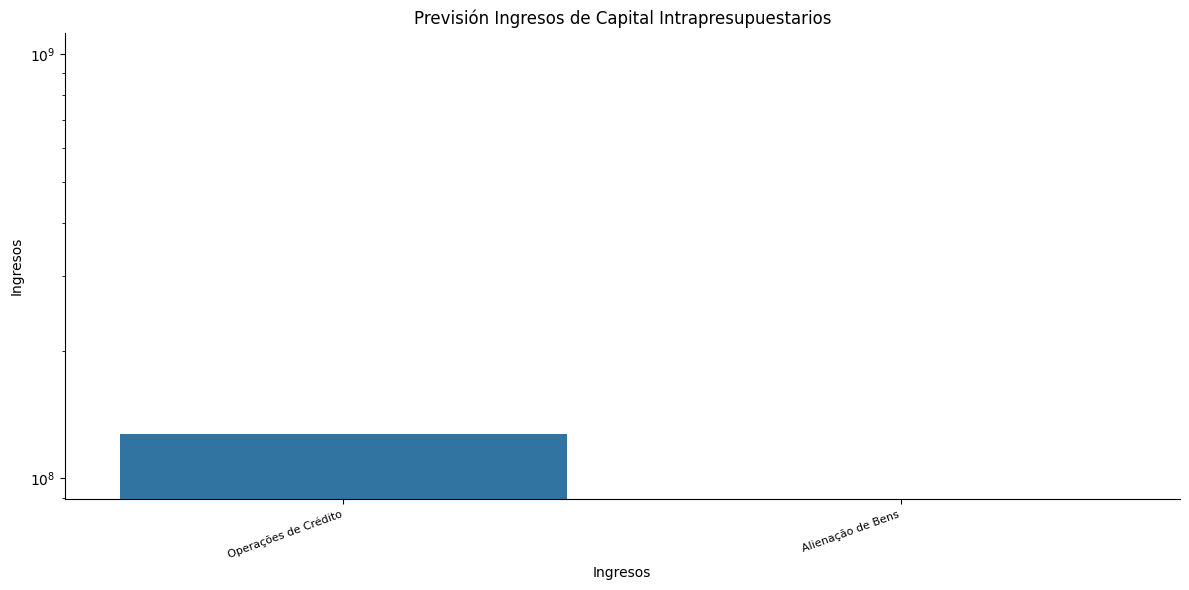

In [13]:
fs.grafico_cat_economia(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

#### *Entradas sin informaci√≥n*

In [37]:
ingresos_sin_info = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Sem informa√ß√£o"]
fs.info_cat(ingresos_sin_info, "ESP√âCIE RECEITA")

VALOR PREVISTO ATUALIZADO    VALOR LAN√áADO  VALOR REALIZADO  \
ESP√âCIE RECEITA                                                                
Sem informa√ß√£o                        0.00 2,812,347,576.39            46.57   

                porcentaje recaudado  diferencia_recaudacion  
ESP√âCIE RECEITA                                               
Sem informa√ß√£o        Previsi√≥n de 0       -2,812,347,529.82

## An√°lisis por entidad gubernamental

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
# Ingresos por entidad gubernamental
entidad_gub = fs.info_cat(datos_brasil, "NOME √ìRG√ÉO SUPERIOR").reset_index()
entidad_gub

NOME √ìRG√ÉO SUPERIOR  VALOR PREVISTO ATUALIZADO  \
0                        Advocacia-Geral da Uni√£o           3,726,053,651.00   
1                    Controladoria-Geral da Uni√£o             740,692,856.00   
2   Minist√©rio da Agricultura, Pecu√°ria e Abastec          87,492,532,893.00   
3                         Minist√©rio da Cidadania          43,958,882,249.00   
4   Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes           62,254,372,476.31   
5                            Minist√©rio da Defesa         198,522,792,044.00   
6                          Minist√©rio da Economia      26,486,420,136,019.00   
7                          Minist√©rio da Educa√ß√£o         609,585,887,826.00   
8                    Minist√©rio da Infraestrutura         119,972,882,836.00   
9       Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica          36,304,805,355.02   
10  Minist√©rio da Mulher, Fam√≠lia e Direitos Huma             843,366,940.00   
11              Minist√©rio da Pesca e Aquicultura              40,939,194.00   
12               Minist√©rio da Previd√™ncia Social              37,327,399.00   
13                            Minist√©rio da Sa√∫de          46,656,321,844.00   
14                    Minist√©rio das Comunica√ß√µes          50,303,390,042.00   
15  Minist√©rio das Mulheres, Igualdade Racial, da             109,699,610.00   
16             Minist√©rio das Rela√ß√µes Exteriores           5,328,738,148.00   
17                  Minist√©rio de Minas e Energia         354,233,973,334.00   
18          Minist√©rio do Desenvolvimento Agr√°rio             558,355,581.00   
19         Minist√©rio do Desenvolvimento Regional         125,967,254,487.00   
20                          Minist√©rio do Esporte             120,909,686.40   
21                    Minist√©rio do Meio Ambiente          12,106,708,057.00   
22               Minist√©rio do Trabalho e Emprego          14,328,825,280.00   
23                          Minist√©rio do Turismo          13,828,150,327.00   
24                       Presid√™ncia da Rep√∫blica          64,130,813,734.00   

          VALOR LAN√áADO       VALOR REALIZADO  porcentaje recaudado  \
0                  0.00        334,962,977.49                  8.99   
1                  0.00          7,555,037.45                  1.02   
2                  0.00     56,433,953,381.26                 64.50   
3                  0.00      5,143,388,129.18                 11.70   
4             79,230.26     34,791,131,893.58                 55.89   
5                  0.00    104,665,740,965.96                 52.72   
6  5,367,369,003,775.87 24,709,753,338,137.24                 93.29   
7          3,516,427.16    221,589,353,642.78                 36.35   
8                  0.00    136,206,900,382.34                113.53   
9                  0.00     25,219,154,299.03                 69.47   
10                 0.00        211,689,152.70                 25.10   
11                 0.00         57,749,317.66                141.06   
12                 0.00         14,240,783.79                 38.15   
13       125,949,190.83     37,786,245,892.63                 80.99   
14            11,831.64     40,047,759,133.20                 79.61   
15                 0.00        136,845,774.52                124.75   
16                 0.00      2,931,914,529.32                 55.02   
17    13,136,233,568.97    191,485,924,485.02                 54.06   
18                 0.00        514,953,670.74                 92.23   
19                 0.00     19,356,487,150.32                 15.37   
20                 0.00         53,896,237.79                 44.58   
21             4,506.00      7,127,409,730.62                 58.87   
22                 0.00     13,484,362,951.59                 94.11   
23        51,866,238.80     13,535,637,878.06                 97.88   
24                 0.00     16,491,839,911.74                 25.72   

    diferencia_recaudacion  
0           334,962,977.49 

A continuaci√≥n vamos a realizar un an√°lisis detallado de los ingresos obtenidos por cada ministerio.

### *Procuradur√≠a General de la Uni√≥n (Advocacia-Geral da Uni√£o)*

In [17]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Advocacia-Geral da Uni√£o")

Los √≥rganos de los que se compone el Advocacia-Geral da Uni√£o son: ['Advocacia-Geral da Uni√£o - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Advocacia-Geral da Uni√£o son: ['COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU']
Los ingresos entre 2013 y 2025 del Advocacia-Geral da Uni√£o son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                  
Advocacia-Geral da Uni√£o           3,726,053,651.00           0.00   

                          VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                               
Advocacia-Geral da Uni√£o   334,962,977.49                  8.99   

                          diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                               
Advocacia-Geral da Uni√£o          334,962,977.49

In [18]:
# Vemos la evoluci√≥n temporal de los ingresos del ministerio
temporal_advocacia = fs.info_ministerio(datos_brasil, "Advocacia-Geral da Uni√£o")
temporal_advocacia

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00    79,852,984.21
2014                    0.00    81,496,388.31
2015                    0.00   101,197,295.07
2016                    0.00    45,835,844.35
2017                    0.00    20,994,103.08
2018                    0.00     4,429,290.22
2019                    0.00     1,157,072.25
2020                    0.00            -0.00
2021                    0.00             0.00

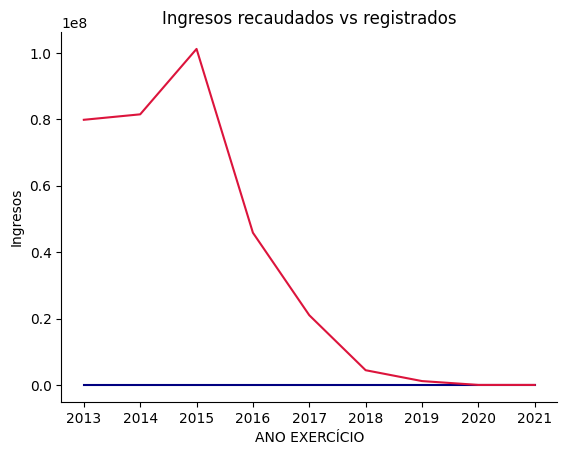

In [19]:
fs.evolucion_temporal(temporal_advocacia, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

La Procuradur√≠a General de la Uni√≥n ha recaudado un total de 334.962.977,49 $ entre 2013 y 2021, representando esto un 8,99 % de lo previsto a recaudar. Asimismo nos encontramos que ha registrado un total de 0 d√≥lares de lo recaudado finalmente. El a√±o en el que m√°s ha recaudado ha sido 2015, y a partir de ese a√±o la recaudaci√≥n se ve reducida hasta llegar a los 0 d√≥lares en 2020. 

### *Contralor√≠a General de la Uni√≥n (Controladoria-Geral da Uni√£o)*

In [20]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Controladoria-Geral da Uni√£o")

Los √≥rganos de los que se compone el Controladoria-Geral da Uni√£o son: ['Controladoria-Geral da Uni√£o'
 'Controladoria-Geral da Uni√£o - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Controladoria-Geral da Uni√£o son: ['DIRETORIA DE GESTAO INTERNA/SE/CGU' 'DIRETORIA DE GESTAO INTERNA(CGU)']
Los ingresos entre 2013 y 2025 del Controladoria-Geral da Uni√£o son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                      
Controladoria-Geral da Uni√£o             740,692,856.00           0.00   

                              VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                   
Controladoria-Geral da Uni√£o     7,555,037.45                  1.02   

                              diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                   
Controladoria-Geral da Uni√£o            7,555,037.45

In [21]:
temporal_controladoria = fs.info_ministerio(datos_brasil, "Controladoria-Geral da Uni√£o")
temporal_controladoria

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00     1,250,774.97
2014                    0.00       266,947.18
2015                    0.00       884,447.32
2016                    0.00     1,277,912.59
2017                    0.00     3,863,278.55
2018                    0.00        11,676.84
2020                    0.00             0.00
2021                    0.00             0.00

In [22]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Controladoria-Geral da Uni√£o")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                            
Controladoria-Geral da Uni√£o                       DIRETORIA DE GESTAO INTERNA/SE/CGU              19,176,752.00   
Controladoria-Geral da Uni√£o - Unidades com v√≠n... DIRETORIA DE GESTAO INTERNA(CGU)               721,516,104.00   

                                                                                       VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                
Controladoria-Geral da Uni√£o                       DIRETORIA DE GESTAO INTERNA/SE/CGU           0.00   
Controladoria-Geral da Uni√£o - Unidades com v√≠n... DIRETORIA DE GESTAO INTERNA(CGU)             0.00   

                                                                                       VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                  
Controladoria-Geral da Uni√£o                       DIRETORIA DE GESTAO INTERNA/SE/CGU     4,346,194.92   
Controladoria-Geral da Uni√£o - Unidades com v√≠n... DIRETORIA DE GESTAO INTERNA(CGU)       3,208,842.53   

                                                                                       porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                        
Controladoria-Geral da Uni√£o                       DIRETORIA DE GESTAO INTERNA/SE/CGU                   22.66  
Controladoria-Geral da Uni√£o - Unidades com v√≠n... DIRETORIA DE GESTAO INTERNA(CGU)                      0.44

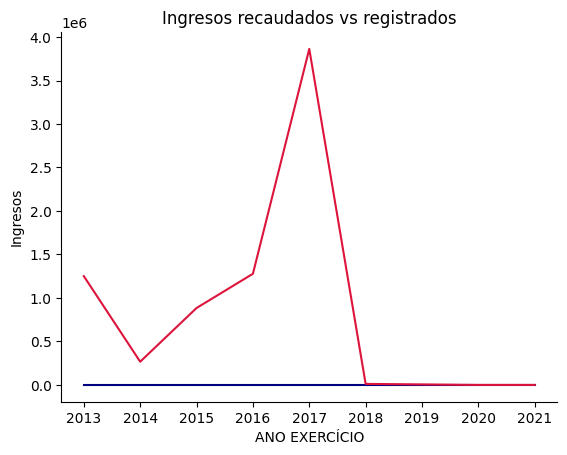

In [23]:
fs.evolucion_temporal(temporal_controladoria, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

La Contralor√≠a General de la Uni√≥n ha recaudado un total de 740.692.856 $ entre 2013 y 2021, representando esto un 1,02 % de lo previsto a recaudar. Asimismo nos encontramos que ha registrado un total de 0 d√≥lares de lo recaudado finalmente. El a√±o en el que m√°s ha recaudado ha sido 2017, a√±o a partir del cual los ingresos de este ministerio se ven completamente reducidos a cero.

### *Ministerio de Agricultura, Ganader√≠a y Abastecimiento (Minist√©rio da Agricultura, Pecu√°ria e Abastec)* üê§

In [24]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Agricultura, Pecu√°ria e Abastec")

Los √≥rganos de los que se compone el Minist√©rio da Agricultura, Pecu√°ria e Abastec son: ['Empresa Brasileira de Pesquisa Agropecu√°ria'
 'Minist√©rio da Agricultura, Pecu√°ria e Abastecimento - Unidades com v√≠nculo direto'
 'Companhia Nacional de Abastecimento' 'Servi√ßo Florestal Brasileiro'
 'Instituto Nacional de Coloniza√ß√£o e Reforma Agr√°ria'
 'Fundo de Defesa da Economia Cafeeira'
 'Fundo de Terras e da Reforma Agr√°ria'
 'Secretaria Especial de Agricultura Familiar e do Desenvolvimento Agr√°rio']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Agricultura, Pecu√°ria e Abastec son: ['EMBRAPA-SETORIAL' 'COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA'
 'COMPANHIA NACIONAL DE ABASTECIMENTO'
 'SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB'
 'DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA'
 'FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA' 'CREDITO FUNDIARIO'
 'SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO'
 'SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR'
 'COORDENACAO-GE

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                        
Minist√©rio da Agricultura, Pecu√°ria e Abastec          87,492,532,893.00   

                                               VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                            
Minist√©rio da Agricultura, Pecu√°ria e Abastec           0.00   

                                                VALOR REALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                               
Minist√©rio da Agricultura, Pecu√°ria e Abastec 56,433,953,381.26   

                                               porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                   
Minist√©rio da Agricultura, Pecu√°ria e Abastec                 64.50   

                                               diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                                    
Minist√©rio da Agricultura, Pecu√°ria e Abastec       56,433,953,381.26

In [25]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_agricultura = fs.info_ministerio(datos_brasil, "Minist√©rio da Agricultura, Pecu√°ria e Abastec")
temporal_agricultura

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00 6,302,036,557.43
2014                    0.00 4,800,117,367.13
2015                    0.00 6,200,536,186.78
2016                    0.00 6,245,684,227.04
2017                    0.00 6,981,982,293.88
2018                    0.00 6,059,488,240.06
2019                    0.00 6,871,989,141.97
2020                    0.00 6,955,897,667.06
2021                    0.00 6,016,221,699.91

In [26]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Agricultura, Pecu√°ria e Abastec")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO                    16,181,320,395.00   
Empresa Brasileira de Pesquisa Agropecu√°ria        EMBRAPA-SETORIAL                                        4,543,365,404.00   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA           44,763,486,199.00   
Fundo de Terras e da Reforma Agr√°ria               COORDENACAO-GERAL DO FUNDO DE TERRAS                                0.00   
                                                   CREDITO FUNDIARIO                                         795,133,061.00   
Instituto Nacional de Coloniza√ß√£o e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA          14,644,570,444.00   
Minist√©rio da Agricultura, Pecu√°ria e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA               6,059,471,621.00   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR               5,327,629.00   
Secretaria Especial de Agricultura Familiar e d... SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO               98,336,469.00   
Servi√ßo Florestal Brasileiro                       SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB               401,521,671.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO                     0.00   
Empresa Brasileira de Pesquisa Agropecu√°ria        EMBRAPA-SETORIAL                                        0.00   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA            0.00   
Fundo de Terras e da Reforma Agr√°ria               COORDENACAO-GERAL DO FUNDO DE TERRAS                    0.00   
                                                   CREDITO FUNDIARIO                                       0.00   
Instituto Nacional de Coloniza√ß√£o e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA           0.00   
Minist√©rio da Agricultura, Pecu√°ria e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA               0.00   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR           0.00   
Secretaria Especial de Agricultura Familiar e d... SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO            0.00   
Servi√ßo Florestal Brasileiro                       SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB             0.00   

                                                                                                   VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                              
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO            1,157,437,895.80   
Empresa Brasileira de Pesquisa Agropecu√°ria        EMBRAPA-SETORIAL                                 410,143,266.07   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA  35,393,834,816.34   
Fundo de Terras e da Reforma Agr√°ria               COORDENACAO-GERAL DO FUNDO DE TERRAS              89,215,763.39   
                                                   CREDITO FUNDIARIO                              1,614,404,425.39   
Instituto Nacional de Coloniza√ß√£o e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA 15,239,509,246.71   
Minist√©rio da Agricultura, Pecu√°ria e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA      2,343,661,823.46   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR      3

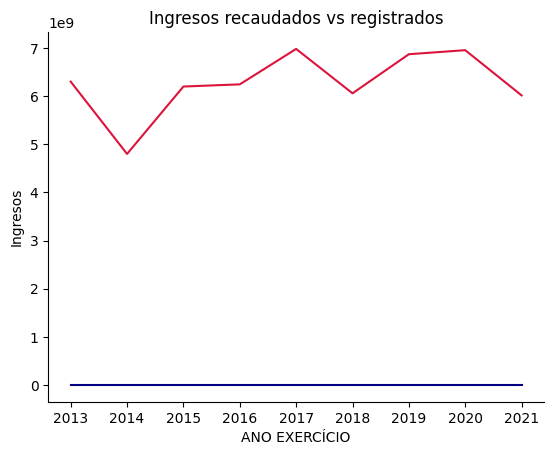

In [27]:
fs.evolucion_temporal(temporal_agricultura, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de los Derechos Humanos y la Ciudadan√≠a (Minist√©rio dos Direitos Humanos e da Cidadania)* üë™

In [29]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Cidadania")

Los √≥rganos de los que se compone el Minist√©rio da Cidadania son: ['Minist√©rio da Cidadania - Unidades com v√≠nculo direto'
 'Fundo Nacional de Assist√™ncia Social']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Cidadania son: ['COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC'
 'DEPARTAMENTO DE GESTAO INTERNA' 'SETORIAL DE ORCAMENTO E FINANCAS/MC'
 'FUNDO NACIONAL DE ASSISTENCIA SOCIAL'
 'SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)']
Los ingresos entre 2013 y 2025 del Minist√©rio da Cidadania son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                 
Minist√©rio da Cidadania          43,958,882,249.00           0.00   

                         VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                              
Minist√©rio da Cidadania 5,143,388,129.18                 11.70   

                         diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                              
Minist√©rio da Cidadania        5,143,388,129.18

In [30]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_ciudadania = fs.info_ministerio(datos_brasil, "Minist√©rio da Cidadania")
temporal_ciudadania

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00   464,236,471.19
2014                    0.00   462,826,578.28
2015                    0.00   426,955,944.03
2016                    0.00   420,492,793.15
2017                    0.00   512,550,755.06
2018                    0.00   136,807,250.43
2019                    0.00   378,863,461.42
2020                    0.00   650,773,921.11
2021                    0.00 1,689,880,954.51

In [31]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Cidadania")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Fundo Nacional de Assist√™ncia Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL                   31,243,675,564.00   
Minist√©rio da Cidadania - Unidades com v√≠nculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC                 836,897.00   
                                                   DEPARTAMENTO DE GESTAO INTERNA                            391,529,812.00   
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC                    10,034,198,132.00   
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)               2,288,641,844.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Fundo Nacional de Assist√™ncia Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL                    0.00   
Minist√©rio da Cidadania - Unidades com v√≠nculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC           0.00   
                                                   DEPARTAMENTO DE GESTAO INTERNA                          0.00   
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC                     0.00   
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)               0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Fundo Nacional de Assist√™ncia Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL            384,991,312.66   
Minist√©rio da Cidadania - Unidades com v√≠nculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC    61,200,344.85   
                                                   DEPARTAMENTO DE GESTAO INTERNA                  119,978,663.21   
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC           4,011,140,623.79   
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)       566,077,184.67   

                                                                                                  porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                   
Fundo Nacional de Assist√™ncia Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL                             1.23  
Minist√©rio da Cidadania - Unidades com v√≠nculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC                7,312.77  
                                                   DEPARTAMENTO DE GESTAO INTERNA                                  30.64  
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC                             39.97  
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)                       24.73

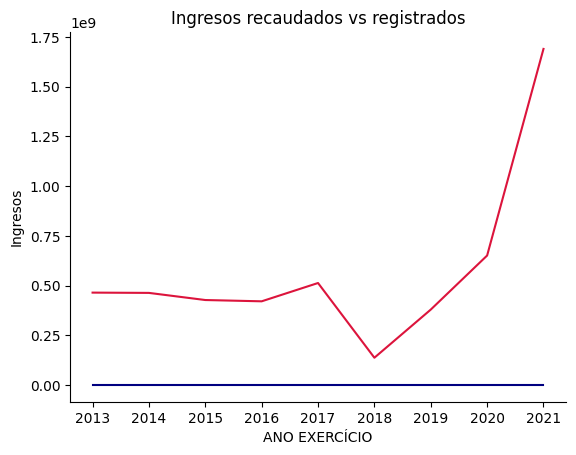

In [32]:
fs.evolucion_temporal(temporal_ciudadania, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

# REVISAR

### *Ministerio de Ciencia, Tecnolog√≠a e Innovaci√≥n* üî¨

In [13]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes")

Los √≥rganos de los que se compone el Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes son: []
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes son: []
Los ingresos entre 2013 y 2025 del Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes son: 



Empty DataFrame
Columns: [VALOR PREVISTO ATUALIZADO, VALOR LAN√áADO, VALOR REALIZADO, porcentaje recaudado, diferencia_recaudacion]
Index: []

In [14]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_ciencia = fs.info_ministerio(datos_brasil, "Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes")
temporal_ciencia

Empty DataFrame
Columns: [VALOR LAN√áADO, VALOR REALIZADO]
Index: []

In [15]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Ci√™ncia, Tecnologia, Inova√ß√µes")

Empty DataFrame
Columns: [VALOR PREVISTO ATUALIZADO, VALOR LAN√áADO, VALOR REALIZADO, porcentaje_recaudacion]
Index: []

In [ ]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_ciencia, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Defensa (Minist√©rio da Defesa)* üöì


In [33]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Defesa")

Los √≥rganos de los que se compone el Minist√©rio da Defesa son: ['Fundo Aeron√°utico' 'Fundo do Ex√©rcito'
 'Comando da Marinha - Fundo Naval' 'Fundo Aerovi√°rio'
 'Comando da Marinha' 'Comando do Ex√©rcito' 'Comando da Aeron√°utica'
 'Caixa de Constru√ß√µes de Casas para o Pessoal da Marinha do Brasil'
 'Minist√©rio da Defesa - Unidades com v√≠nculo direto'
 'Fundo de Desenvolvimento do Ensino Profissional Mar√≠timo'
 'Ind√∫stria de Material B√©lico do Brasil'
 'Caixa de Financiamento Imobili√°rio da Aeron√°utica' 'Funda√ß√£o Os√≥rio'
 'Amaz√¥nia Azul Tecnologia de Defesa S.A.']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Defesa son: ['SECRETARIA DE ECON. E FIN.DA AER.- F.AER.' 'FUNDO DO EXERCITO'
 'DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM'
 'AGENCIA NACIONAL DE AVIACAO CIVIL - F. AEROV.'
 'DIRETORIA DE FINANCAS DA MARINHA-SISTEMA-PAIS'
 'D CONT - SETORIAL FINANCEIRA'
 'DIRETORIA DE ECON E FINANCAS DA AERONAUTICA'
 'DIRETORIA DE FINANCAS DA MARINHA - CCCPM'

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                              
Minist√©rio da Defesa         198,522,792,044.00           0.00   

                        VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                             
Minist√©rio da Defesa 104,665,740,965.96                 52.72   

                      diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                           
Minist√©rio da Defesa      104,665,740,965.96

In [34]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_defensa = fs.info_ministerio(datos_brasil, "Minist√©rio da Defesa")
temporal_defensa

VALOR LAN√áADO   VALOR REALIZADO
ANO EXERC√çCIO                                 
2013                    0.00  7,996,268,815.41
2014                    0.00  8,799,586,489.04
2015                    0.00 10,208,523,254.25
2016                    0.00 12,433,424,392.19
2017                    0.00 12,551,250,887.04
2018                    0.00 11,885,716,237.33
2019                    0.00 12,929,824,036.30
2020                    0.00 13,639,504,609.70
2021                    0.00 14,221,642,244.70

In [35]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Defesa")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Amaz√¥nia Azul Tecnologia de Defesa S.A.            DIRETORIA DE FINANCAS DA MARINHA - AMAZUL                 286,164,674.00   
Caixa de Constru√ß√µes de Casas para o Pessoal da... DIRETORIA DE FINANCAS DA MARINHA - CCCPM                2,259,976,175.00   
Caixa de Financiamento Imobili√°rio da Aeron√°utica  CAIXA FINANCIAMENTO IMOBILIARIO AERONAUTICA                80,735,884.00   
Comando da Aeron√°utica                             DIRETORIA DE ECON E FINANCAS DA AERONAUTICA            28,352,346,044.00   
                                                   MAER - DIFERENCA CAMBIAL                                            0.00   
Comando da Marinha                                 DIRETORIA DE FINANCAS DA MARINHA-SISTEMA-PAIS          36,912,112,387.00   
                                                   MARINHA - DIFERENCA CAMBIAL                                         0.00   
Comando da Marinha - Fundo Naval                   DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM            7,343,977,665.00   
                                                   FUNDO NAVAL - DIFERENCA CAMBIAL                                     0.00   
Comando do Ex√©rcito                                D CONT - SETORIAL FINANCEIRA                           46,456,579,586.00   
Funda√ß√£o Os√≥rio                                    FUNDACAO OSORIO                                            21,949,102.00   
Fundo Aeron√°utico                                  SECRETARIA DE ECON. E FIN.DA AER.- F.AER.              27,712,065,766.00   
Fundo Aerovi√°rio                                   AGENCIA NACIONAL DE AVIACAO CIVIL - F. AEROV.                       0.00   
Fundo de Desenvolvimento do Ensino Profissional... DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM            1,958,564,873.00   
Fundo do Ex√©rcito                                  FDO EXERCITO - DIFERENCA CAMBIAL                                    0.00   
                                                   FUNDO DO EXERCITO                                      13,480,186,945.00   
Ind√∫stria de Material B√©lico do Brasil             INDUSTRIA DE MATERIAL BELICO DO BRASIL/GESTOR             941,148,173.00   
Minist√©rio da Defesa - Unidades com v√≠nculo direto DEPARTAMENTO DE PLANEJ, ORC E FINANCAS (MD)            32,716,984,770.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Amaz√¥nia Azul Tecnologia de Defesa S.A.            DIRETORIA DE FINANCAS DA MARINHA - AMAZUL               0.00   
Caixa de Constru√ß√µes de Casas para o Pessoal da... DIRETORIA DE FINANCAS DA MARINHA - CCCPM                0.00   
Caixa de Financiamento Imobili√°rio da Aeron√°utica  CAIXA FINANCIAMENTO IMOBILIARIO AERONAUTICA             0.00   
Comando da Aeron√°utica                             DIRETORIA DE ECON E FINANCAS DA AERONAUTICA             0.00   
                                                   MAER - DIFERENCA CAMBIAL                                0.00   
Comando da Marinha                                 DIRETORIA DE FINANCAS DA MARINHA-SISTEMA-PAIS           0.00   
                                                   MARINHA - DIFERENCA CAMBIAL                             0.00   
Comando da Marinha - Fundo Naval                   DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM            0.00   
                                                   FUNDO NAVAL - DIFERENCA CAMBIAL                         0.00   
Comando do Ex√©rcito                                D CONT - SETORIAL FINANCEIRA                            0.00   
Funda√ß√£o Os√≥rio                                    FUNDACAO OSORIO                                         0.00   
Fundo Aeron√°utico            

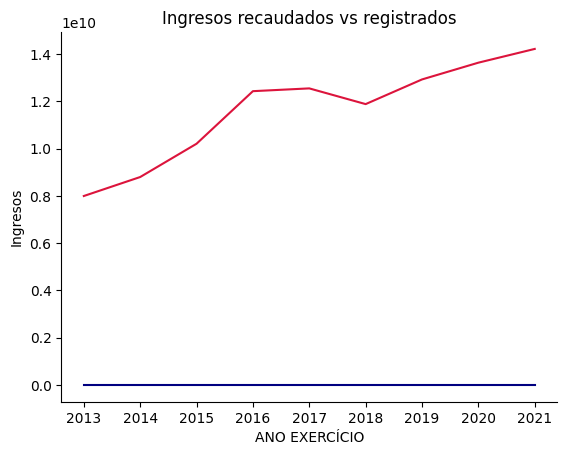

In [36]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_defensa, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Econom√≠a/ Hacienda (Minist√©rio da Economia/Fazenda)* üí∞

In [37]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Economia")

Los √≥rganos de los que se compone el Minist√©rio da Economia son: ['Minist√©rio da Economia - Unidades com v√≠nculo direto'
 'Instituto Nacional de Metrologia, Qualidade e Tecnologia'
 'Instituto Nacional do Seguro Social'
 'Funda√ß√£o Instituto Brasileiro de Geografia e Estat√≠stica'
 'Superintend√™ncia da Zona Franca de Manaus'
 'Banco Central do Brasil - Or√ßamento Fiscal e Seguridade Social'
 'Fundo de Amparo ao Trabalhador' 'Superintend√™ncia de Seguros Privados'
 'Superintend√™ncia Nacional de Previd√™ncia Complementar'
 'Instituto Nacional da Propriedade Industrial'
 'Comiss√£o de Valores Mobili√°rios'
 'Funda√ß√£o Jorge Duprat Figueiredo, de Seguran√ßa e Medicina do Trabalho'
 'Funda√ß√£o Escola Nacional de Administra√ß√£o P√∫blica'
 'Fundo Constitucional do Distrito Federal'
 'Servi√ßo Federal de Processamento de Dados'
 'Fundo de Garantia √† Exporta√ß√£o'
 'Companhia de Entrepostos e Armaz√©ns Gerais de S√£o Paulo'
 'Fundo de Compensa√ß√£o de Varia√ß√µes Salariais' 'Casa da 

VALOR PREVISTO ATUALIZADO        VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                      
Minist√©rio da Economia      26,486,420,136,019.00 5,367,369,003,775.87   

                             VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                  
Minist√©rio da Economia 24,709,753,338,137.24                 93.29   

                        diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                             
Minist√©rio da Economia   19,342,384,334,361.37

In [38]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_economia = fs.info_ministerio(datos_brasil, "Minist√©rio da Economia")
temporal_economia

VALOR LAN√áADO      VALOR REALIZADO
ANO EXERC√çCIO                                          
2013          1,142,510,812,240.63 1,817,203,128,234.24
2014          1,266,517,976,553.31 2,157,443,569,562.18
2015            307,183,706,610.45 2,580,695,615,515.46
2016            325,832,148,068.27 2,735,629,351,666.91
2017            458,047,252,394.30 2,454,950,768,575.88
2018            466,611,880,983.15 2,853,016,876,441.76
2019            341,927,061,565.79 2,808,484,295,474.50
2020            701,810,109,974.20 3,531,378,318,841.18
2021            356,928,055,385.77 3,770,951,413,825.13

In [39]:
# Vemos la informaci√≥n sobre su composici√≥n.
economia = fs.info_ministerio(datos_brasil, "Minist√©rio da Economia")
economia

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                      
Banco Central do Brasil - Or√ßamento Fiscal e Se... BANCO CENTRAL DO BRASIL                                6,434,042,090.00   
Casa da Moeda do Brasil                            CASA DA MOEDA DO BRASIL                                7,805,920,775.00   
Comiss√£o de Valores Mobili√°rios                    COMISSAO DE VALORES MOBILIARIOS                        3,838,580,798.00   
Companhia de Entrepostos e Armaz√©ns Gerais de S... CIA.DE ENTREPOSTOS E ARMAZENS GER.DE S.PAULO                       0.00   
Funda√ß√£o Escola Nacional de Administra√ß√£o P√∫blica  FUNDACAO ESCOLA NACIONAL DE ADM. PUBLICA                  79,097,837.00   
...                                                                                                                    ...   
Reserva de Conting√™ncia                            RESERVA DE CONTINGENCIA/MEFP                           8,328,542,066.00   
Servi√ßo Federal de Processamento de Dados          SERPRO-SEDE - DEPARTAMENTO FINANCEIRO                              0.00   
Superintend√™ncia Nacional de Previd√™ncia Comple... COORD.GERAL DE ORC. FIN. E CONTABILIDADE                 401,149,074.00   
Superintend√™ncia da Zona Franca de Manaus          SUPERINTENDENCIA DA ZONA FRANCA DE MANAUS/AM           4,531,866,145.00   
Superintend√™ncia de Seguros Privados               SUPERINTENDENCIA DE SEGUROS PRIVADOS - RJ              1,948,353,073.00   

                                                                                                   VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                            
Banco Central do Brasil - Or√ßamento Fiscal e Se... BANCO CENTRAL DO BRASIL                                  0.00   
Casa da Moeda do Brasil                            CASA DA MOEDA DO BRASIL                                  0.00   
Comiss√£o de Valores Mobili√°rios                    COMISSAO DE VALORES MOBILIARIOS              1,023,322,055.73   
Companhia de Entrepostos e Armaz√©ns Gerais de S... CIA.DE ENTREPOSTOS E ARMAZENS GER.DE S.PAULO             0.00   
Funda√ß√£o Escola Nacional de Administra√ß√£o P√∫blica  FUNDACAO ESCOLA NACIONAL DE ADM. PUBLICA                 0.00   
...                                                                                                          ...   
Reserva de Conting√™ncia                            RESERVA DE CONTINGENCIA/MEFP                             0.00   
Servi√ßo Federal de Processamento de Dados          SERPRO-SEDE - DEPARTAMENTO FINANCEIRO                    0.00   
Superintend√™ncia Nacional de Previd√™ncia Comple... COORD.GERAL DE ORC. FIN. E CONTABILIDADE            53,977.93   
Superintend√™ncia da Zona Franca de Manaus          SUPERINTENDENCIA DA ZONA FRANCA DE MANAUS/AM             0.00   
Superintend√™ncia de Seguros Privados               SUPERINTENDENCIA DE SEGUROS PRIVADOS - RJ        4,214,975.46   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Banco Central do Brasil - Or√ßamento Fiscal e Se... BANCO CENTRAL DO BRASIL                       7,261,721,544.67   
Casa da Moeda do Brasil                            CASA DA MOEDA DO BRASIL                       9,922,050,070.42   
Comiss√£o de Valores Mobili√°rios                    COMISSAO DE VALORES MOBILIARIOS               3,821,151,456.84   
Companhia de Entrepostos e Armaz√©ns Gerais de S... CIA.DE ENTREPOSTOS E ARMAZENS GER.DE S.PAULO    829,668,503.77   
Funda√ß√£o Escola Nacional de Administra√ß√£o P√∫blica  FUNDACAO ESCOLA NACIONAL DE ADM. PUBLICA          7,265,134.34   
...                                                                                 

In [38]:
economia[economia["VALOR REALIZADO"] == 0]

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Minist√©rio da Economia - Unidades com v√≠nculo d... PROCURADORIA DA FAZ.NAC. NO ESTADO DO AMAPA                         0.00   
                                                   PROCURADORIA DA FAZENDA NACI0NAL/GO                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - BA                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - MA                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - MG                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - PI                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL EM RONDONIA                        0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-ES                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-MS                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-PR                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-SE                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/AC                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/AL                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/AM                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/CE                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/MT                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/PA                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/PB                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/RN                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/RR                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/SC                                 0.00   
                                                   PROCURADORIA FAZ.NACIONAL NO EST.TOCANTINS                          0.00   
                                                   PROCURADORIA GERAL DA FAZENDA NACIONAL                              0.00   
                                                   PROCURADORIA REGIONAL DA F.NACIONAL/4A REGIAO                       0.00   
                                                   PROCURADORIA-REGIONAL DA FAZ.NAC.1A.REGIAO/DF                       0.00   
                                                   PROCURADORIA-REGIONAL DA FAZENDA NACIONAL/PE                        0.00   
                                                   PROCURADORIA-REGIONAL DA FAZENDA NACIONAL/RJ                        0.00   
                                                   PROCURADORIA-REGIONAL DA FAZENDA NACIONAL/SP                        0.00   
                                                   SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB                         0.00   
Reserva de Conting√™ncia                            RESERVA DE CONTINGENCIA/MEFP                            8,328,542,066.00   

                            

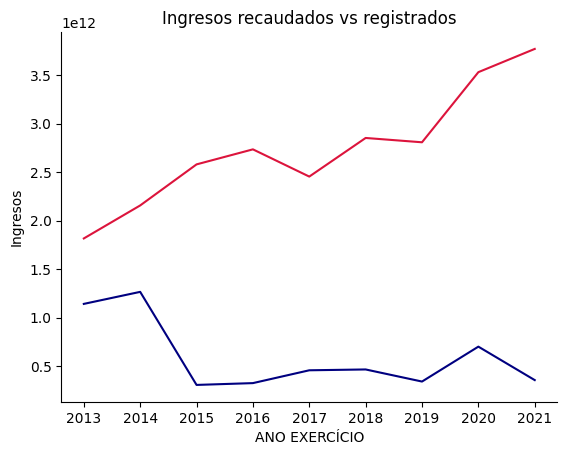

In [40]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_economia, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Educaci√≥n (Minist√©rio da Educa√ß√£o)* üìö

In [41]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Educa√ß√£o")

Los √≥rganos de los que se compone el Minist√©rio da Educa√ß√£o son: ['Instituto Federal do Rio Grande do Norte'
 'Funda√ß√£o Universidade Federal do Mato Grosso'
 'Minist√©rio da Educa√ß√£o - Unidades com v√≠nculo direto'
 'Funda√ß√£o Universidade Federal de S√£o Jo√£o Del-Rei'
 'Universidade Federal do Cear√°' 'Instituto Federal Goiano'
 'Universidade Federal da Bahia' 'Instituto Federal do Cear√°'
 'Funda√ß√£o Joaquim Nabuco' 'Instituto Federal de Sergipe'
 'Instituto Federal Catarinense'
 'Universidade Tecnol√≥gica Federal do Paran√°'
 'Funda√ß√£o Universidade Federal do Tocantins'
 'Universidade Federal do Esp√≠rito Santo'
 'Funda√ß√£o Universidade Federal do Acre'
 'Universidade Federal de Minas Gerais' 'Universidade Federal de Itajub√°'
 'Universidade Federal do Rio Grande do Sul' 'Instituto Federal do Paran√°'
 'Instituto Federal do Mato Grosso'
 'Universidade Federal do Rio Grande do Norte'
 'Instituto Federal de Rond√¥nia'
 'Instituto Federal do Sudeste de Minas Gerais'
 'Fun

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                
Minist√©rio da Educa√ß√£o         609,585,887,826.00   3,516,427.16   

                          VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                               
Minist√©rio da Educa√ß√£o 221,589,353,642.78                 36.35   

                        diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                             
Minist√©rio da Educa√ß√£o      221,585,837,215.62

In [42]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_educacion = fs.info_ministerio(datos_brasil, "Minist√©rio da Educa√ß√£o")
temporal_educacion

VALOR LAN√áADO   VALOR REALIZADO
ANO EXERC√çCIO                                 
2013              160,913.49 19,607,835,174.99
2014              159,089.35 21,757,647,187.75
2015              399,553.04 22,633,975,456.41
2016              399,553.04 23,096,703,890.74
2017              399,553.04 23,454,995,198.27
2018              399,553.04 26,118,137,483.09
2019              399,553.04 27,441,782,079.02
2020              799,106.08 26,996,680,668.96
2021              399,553.04 30,481,596,503.55

In [43]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Educa√ß√£o").sort_values("VALOR REALIZADO")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Instituto Federal Fluminense                       INST.FED. FLUMINENSE/CAMPUS CAMPOS-CENTRO                           0.00   
UNIVERSIDADE FEDERAL DE RONDONOPOLIS               UNIVERSIDADE FEDERAL DE RONDONOPOLIS                       15,559,976.00   
UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO      UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO              13,824,033.00   
UNIVERSIDADE FEDERAL DE CATALAO                    UNIVERSIDADE FEDERAL DE CATALAO                            15,429,240.00   
UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS         UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS                 20,473,210.00   
...                                                                                                                     ...   
Universidade Federal de Juiz de Fora               UNIVERSIDADE FEDERAL DE JUIZ DE FORA                    1,623,914,885.00   
Funda√ß√£o Universidade de Bras√≠lia                  FUNDACAO UNIVERSIDADE DE BRASILIA - FUB                 3,169,915,847.00   
Instituto Nacional de Estudos e Pesquisas Educa... INST.NACIONAL DE EST.E PESQUISAS EDUCACIONAIS           2,079,505,398.00   
Funda√ß√£o Coordena√ß√£o de Aperfei√ßoamento de Pess... FUND.COORD.DE APERF.DE PESSOAL NIVEL SUPERIOR           1,907,279,741.00   
Fundo Nacional de Desenvolvimento da Educa√ß√£o      FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO         231,843,725,939.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Instituto Federal Fluminense                       INST.FED. FLUMINENSE/CAMPUS CAMPOS-CENTRO         332,054.40   
UNIVERSIDADE FEDERAL DE RONDONOPOLIS               UNIVERSIDADE FEDERAL DE RONDONOPOLIS                    0.00   
UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO      UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO           0.00   
UNIVERSIDADE FEDERAL DE CATALAO                    UNIVERSIDADE FEDERAL DE CATALAO                         0.00   
UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS         UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS              0.00   
...                                                                                                         ...   
Universidade Federal de Juiz de Fora               UNIVERSIDADE FEDERAL DE JUIZ DE FORA                    0.00   
Funda√ß√£o Universidade de Bras√≠lia                  FUNDACAO UNIVERSIDADE DE BRASILIA - FUB                 0.00   
Instituto Nacional de Estudos e Pesquisas Educa... INST.NACIONAL DE EST.E PESQUISAS EDUCACIONAIS           0.00   
Funda√ß√£o Coordena√ß√£o de Aperfei√ßoamento de Pess... FUND.COORD.DE APERF.DE PESSOAL NIVEL SUPERIOR           0.00   
Fundo Nacional de Desenvolvimento da Educa√ß√£o      FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO   1,584,807.20   

                                                                                                    VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                               
Instituto Federal Fluminense                       INST.FED. FLUMINENSE/CAMPUS CAMPOS-CENTRO                   0.00   
UNIVERSIDADE FEDERAL DE RONDONOPOLIS               UNIVERSIDADE FEDERAL DE RONDONOPOLIS                    1,480.00   
UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO      UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO           8,905.61   
UNIVERSIDADE FEDERAL DE CATALAO                    UNIVERSIDADE FEDERAL DE CATALAO                         9,750.00   
UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS         UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS             13,613.00   
...                                                                                       

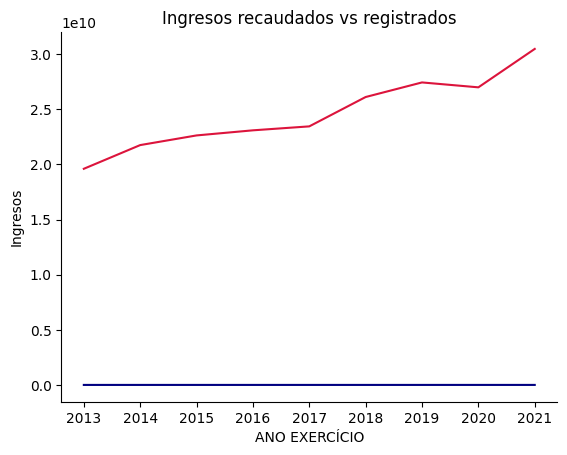

In [44]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_educacion, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Infraestructuras/Transportes (Minist√©rio da Infraestrutura/dos Transportes)* üöä

In [45]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Infraestrutura")

Los √≥rganos de los que se compone el Minist√©rio da Infraestrutura son: ['Ag√™ncia Nacional de Avia√ß√£o Civil'
 'Departamento Nacional de Infraestrutura de Transportes'
 'Ag√™ncia Nacional de Transportes Terrestres'
 'Departamento do Fundo da Marinha Mercante'
 'Fundo Nacional de Seguran√ßa e Educa√ß√£o de Tr√¢nsito'
 'Minist√©rio da Infraestrutura - Unidades com v√≠nculo direto'
 'Ag√™ncia Nacional de Transportes Aquavi√°rios' 'Secretaria de Portos'
 'VALEC Engenharia, Constru√ß√µes e Ferrovias S.A.'
 'Fundo Nacional de Avia√ß√£o Civil'
 'Empresa de Planejamento e Log√≠stica S.A.' 'Secretaria de Avia√ß√£o Civil'
 'Companhia Docas do Estado de S√£o Paulo'
 'Companhia Docas do Estado da Bahia' 'Companhia Docas do Cear√°'
 'Companhia Docas do Rio de Janeiro'
 'Companhia Docas do Rio Grande do Norte' 'Companhia Docas do Par√°'
 'Companhia Docas do Esp√≠rito Santo'
 'Departamento Nacional de Estradas de Rodagem']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Infraest

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                      
Minist√©rio da Infraestrutura         119,972,882,836.00           0.00   

                                VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                     
Minist√©rio da Infraestrutura 136,206,900,382.34                113.53   

                              diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                   
Minist√©rio da Infraestrutura      136,206,900,382.34

In [46]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_infraestructura = fs.info_ministerio(datos_brasil, "Minist√©rio da Infraestrutura")
temporal_infraestructura

VALOR LAN√áADO   VALOR REALIZADO
ANO EXERC√çCIO                                 
2013                    0.00  9,136,194,243.39
2014                    0.00 10,162,876,142.09
2015                    0.00 12,544,696,151.42
2016                    0.00 13,585,810,762.08
2017                    0.00 18,560,601,637.35
2018                    0.00 14,553,996,552.88
2019                    0.00 19,038,929,256.20
2020                    0.00 19,330,610,034.23
2021                    0.00 19,293,185,602.70

In [47]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Infraestrutura")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Ag√™ncia Nacional de Avia√ß√£o Civil                  AGENCIA NACIONAL DE AVIACAO CIVIL                       3,105,073,414.00   
                                                   SUPERINT. INFRAESTRUTURA AEROPORTUARIA - ANAC                       0.00   
Ag√™ncia Nacional de Transportes Aquavi√°rios        AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS               470,636,394.00   
Ag√™ncia Nacional de Transportes Terrestres         AGENCIA NACIONAL DE TRANSPORTES TERRESTRES              7,994,003,773.00   
Companhia Docas do Cear√°                           COMPANHIA DOCAS DO CEARA                                            0.00   
Companhia Docas do Esp√≠rito Santo                  COMPANHIA DOCAS DO ESPIRITO SANTO                                   0.00   
Companhia Docas do Estado da Bahia                 COMPANHIA DOCAS DO ESTADO DA BAHIA                                  0.00   
Companhia Docas do Estado de S√£o Paulo             COMPANHIA DOCAS DO ESTADO DE SAO PAULO                              0.00   
Companhia Docas do Par√°                            COMPANHIA DOCAS DO PARA                                             0.00   
Companhia Docas do Rio Grande do Norte             COMPANHIA DOCA DO RIO GRANDE DO NORTE                               0.00   
Companhia Docas do Rio de Janeiro                  COMPANHIA DOCAS DO RIO DE JANEIRO                                   0.00   
Departamento Nacional de Estradas de Rodagem       DEPARTAMENTO NAC. ESTRADAS E RODAGEM-EXTINCAO                       0.00   
Departamento Nacional de Infraestrutura de Tran... DEPART.NAC.INFRA ESTRUTURA TRANSPORTES.                 5,907,564,022.00   
Departamento do Fundo da Marinha Mercante          FUNDO DA MARINHA MERCANTE                              49,854,529,844.00   
Empresa de Planejamento e Log√≠stica S.A.           EMPRESA DE PLANEJAMENTO E LOGISTICA S.A - EPL              76,611,806.00   
Fundo Nacional de Avia√ß√£o Civil                    FUNDO NACIONAL DE AVIACAO CIVIL                        40,635,944,674.00   
Fundo Nacional de Seguran√ßa e Educa√ß√£o de Tr√¢nsito FUNDO NACIONAL DE SEG. E EDUCACAO DE TRANSITO           8,761,721,319.00   
Minist√©rio da Infraestrutura - Unidades com v√≠n... SUBSECRETARIA DE PLAN.,ORCAM.E ADMIN.SETORIAL           3,016,389,393.00   
Secretaria de Avia√ß√£o Civil                        SECRETARIA DE AVIACAO CIVIL/PR                                      0.00   
Secretaria de Portos                               SECRETARIA DE PORTOS/PR                                     7,659,245.00   
VALEC Engenharia, Constru√ß√µes e Ferrovias S.A.     VALEC ENGENHARIA CONSTRUCOES E FERROVIAS S/A.             142,748,952.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Ag√™ncia Nacional de Avia√ß√£o Civil                  AGENCIA NACIONAL DE AVIACAO CIVIL                       0.00   
                                                   SUPERINT. INFRAESTRUTURA AEROPORTUARIA - ANAC           0.00   
Ag√™ncia Nacional de Transportes Aquavi√°rios        AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS             0.00   
Ag√™ncia Nacional de Transportes Terrestres         AGENCIA NACIONAL DE TRANSPORTES TERRESTRES              0.00   
Companhia Docas do Cear√°                           COMPANHIA DOCAS DO CEARA                                0.00   
Companhia Docas do Esp√≠rito Santo                  COMPANHIA DOCAS DO ESPIRITO SANTO                       0.00   
Companhia Docas do Estado da Bahia                 COMPANHIA DOCAS DO ESTADO DA BAHIA                      0.00   
Companhia Docas do Estado de S√£o Paulo             COMPANHIA DOCAS DO ESTADO DE SAO PAULO               

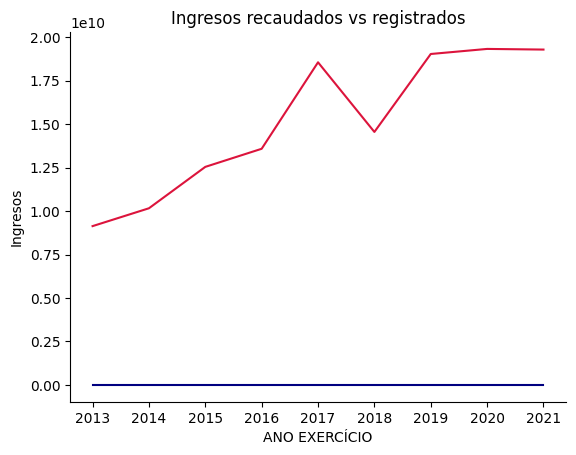

In [48]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_infraestructura, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Justicia y Seguridad P√∫blica (Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica)* üëÆ

In [49]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica")

Los √≥rganos de los que se compone el Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica son: ['Departamento de Pol√≠cia Rodovi√°ria Federal'
 'Departamento de Pol√≠cia Federal'
 'Secretaria Nacional do Consumidor Fundo' 'Fundo Penitenci√°rio Nacional'
 'Funda√ß√£o Nacional do √çndio'
 'Conselho Administrativo de Defesa Econ√¥mica'
 'Fundo Nacional de Seguran√ßa P√∫blica'
 'Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica - Unidades com v√≠nculo direto'
 'Fundo Nacional Antidrogas'
 'Funda√ß√£o Nacional do √çndio - Patrim√¥nio Ind√≠gena']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica son: ['DEPTO.DE POLICIA RODOVIARIA FEDERAL'
 'COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA'
 'FUNDO DE DEFESA DOS DIREITOS DIFUSOS' 'DEPEN - DIRETORIA EXECUTIVA'
 'FUNDACAO NACIONAL DO INDIO - U.O.'
 'CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA'
 'FUNDO NACIONAL DE SEGURANCA PUBLICA - FNSP'
 'COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF'
 'COORDENACAO-GERAL DE 

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                    
Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica          36,304,805,355.02   

                                           VALOR LAN√áADO   VALOR REALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                          
Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica           0.00 25,219,154,299.03   

                                           porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                               
Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica                 69.47   

                                           diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                                
Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica       25,219,154,299.03

In [50]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_justicia = fs.info_ministerio(datos_brasil, "Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica")
temporal_justicia

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00 1,387,996,151.58
2014                    0.00 1,576,975,525.75
2015                    0.00 2,338,091,641.90
2016                    0.00 2,830,886,068.37
2017                    0.00 2,786,600,533.93
2018                    0.00 2,216,559,400.21
2019                    0.00 3,992,215,693.03
2020                    0.00 3,989,584,816.44
2021                    0.00 4,100,244,467.82

In [51]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Conselho Administrativo de Defesa Econ√¥mica        CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA               274,079,653.00   
Departamento de Pol√≠cia Federal                    COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF                       0.00   
                                                   COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA          11,005,405,661.00   
Departamento de Pol√≠cia Rodovi√°ria Federal         COORDENACAO DE ORCAMENTO E FINANCAS - PRF               5,412,239,561.00   
                                                   DEPTO.DE POLICIA RODOVIARIA FEDERAL                     3,493,073,317.00   
Funda√ß√£o Nacional do √çndio                         FUNDACAO NACIONAL DO INDIO - U.O.                         487,327,913.00   
Funda√ß√£o Nacional do √çndio - Patrim√¥nio Ind√≠gena   RENDA DO PATRIMONIO INDIGENA                              400,396,427.02   
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                                 378,278,197.00   
Fundo Nacional de Seguran√ßa P√∫blica                FUNDO NACIONAL DE SEGURANCA PUBLICA - FNSP              3,012,834,756.00   
Fundo Penitenci√°rio Nacional                       DEPEN - DIRETORIA EXECUTIVA                             3,884,210,844.00   
Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica - Uni... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MJ            4,100,338,626.00   
Secretaria Nacional do Consumidor Fundo            FUNDO DE DEFESA DOS DIREITOS DIFUSOS                    3,856,620,400.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Conselho Administrativo de Defesa Econ√¥mica        CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA             0.00   
Departamento de Pol√≠cia Federal                    COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF           0.00   
                                                   COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA           0.00   
Departamento de Pol√≠cia Rodovi√°ria Federal         COORDENACAO DE ORCAMENTO E FINANCAS - PRF               0.00   
                                                   DEPTO.DE POLICIA RODOVIARIA FEDERAL                     0.00   
Funda√ß√£o Nacional do √çndio                         FUNDACAO NACIONAL DO INDIO - U.O.                       0.00   
Funda√ß√£o Nacional do √çndio - Patrim√¥nio Ind√≠gena   RENDA DO PATRIMONIO INDIGENA                            0.00   
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                               0.00   
Fundo Nacional de Seguran√ßa P√∫blica                FUNDO NACIONAL DE SEGURANCA PUBLICA - FNSP              0.00   
Fundo Penitenci√°rio Nacional                       DEPEN - DIRETORIA EXECUTIVA                             0.00   
Minist√©rio da Justi√ßa e Seguran√ßa P√∫blica - Uni... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MJ            0.00   
Secretaria Nacional do Consumidor Fundo            FUNDO DE DEFESA DOS DIREITOS DIFUSOS                    0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Conselho Administrativo de Defesa Econ√¥mica        CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA     280,600,100.26   
Departamento de Pol√≠cia Federal                    COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF        10,058.33   
                                                   COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA 5,917,477,754.82   
Departamento de Pol√≠cia Rodovi√°ria Federal         COORDENACAO DE ORCAMENT

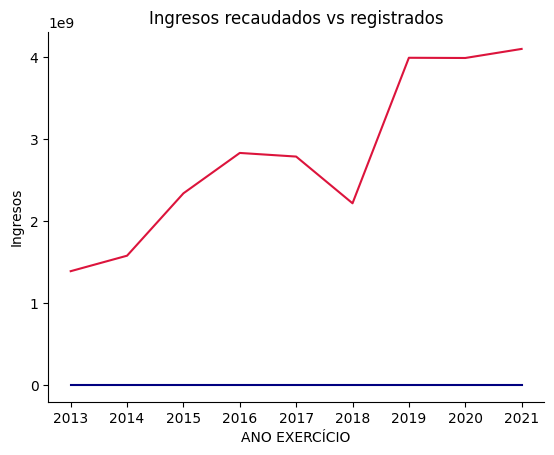

In [52]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_justicia, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de la Mujer (Minist√©rio da Mulher, Fam√≠lia e Direitos Huma)* üôÜ‚Äç‚ôÄÔ∏è

In [54]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Mulher, Fam√≠lia e Direitos Huma")

Los √≥rganos de los que se compone el Minist√©rio da Mulher, Fam√≠lia e Direitos Huma son: ['Secretaria Nacional de Pol√≠ticas para Mulheres'
 'Fundo Nacional do Idoso' 'Fundo Nacional para a Crian√ßa e o Adolescente'
 'Minist√©rio da Mulher, Fam√≠lia e Direitos Humanos - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Mulher, Fam√≠lia e Direitos Huma son: ['SECRETARIA DE POLITICAS PARA AS MULHERES' 'FUNDO NACIONAL DO IDOSO'
 'FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE'
 'SETORIAL ORCAMENTARIA E FINANCEIRA - MDH']
Los ingresos entre 2013 y 2025 del Minist√©rio da Mulher, Fam√≠lia e Direitos Huma son: 



VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                        
Minist√©rio da Mulher, Fam√≠lia e Direitos Huma             843,366,940.00   

                                               VALOR LAN√áADO  VALOR REALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                             
Minist√©rio da Mulher, Fam√≠lia e Direitos Huma           0.00   211,689,152.70   

                                               porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                   
Minist√©rio da Mulher, Fam√≠lia e Direitos Huma                 25.10   

                                               diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                                    
Minist√©rio da Mulher, Fam√≠lia e Direitos Huma          211,689,152.70

In [55]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_mujer = fs.info_ministerio(datos_brasil, "Minist√©rio da Mulher, Fam√≠lia e Direitos Huma")
temporal_mujer

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00    13,156,301.07
2014                    0.00     7,976,509.04
2015                    0.00    17,389,915.16
2016                    0.00    26,119,550.42
2017                    0.00    31,925,109.21
2018                    0.00    32,743,917.35
2019                    0.00    53,600,361.21
2020                    0.00    15,147,995.63
2021                    0.00    13,629,493.61

In [56]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Mulher, Fam√≠lia e Direitos Huma")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Fundo Nacional do Idoso                            FUNDO NACIONAL DO IDOSO                                    72,432,399.00   
Fundo Nacional para a Crian√ßa e o Adolescente      FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE             135,880,431.00   
Minist√©rio da Mulher, Fam√≠lia e Direitos Humano... SETORIAL ORCAMENTARIA E FINANCEIRA - MDH                  634,086,610.00   
Secretaria Nacional de Pol√≠ticas para Mulheres     SECRETARIA DE POLITICAS PARA AS MULHERES                      967,500.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Fundo Nacional do Idoso                            FUNDO NACIONAL DO IDOSO                                 0.00   
Fundo Nacional para a Crian√ßa e o Adolescente      FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE           0.00   
Minist√©rio da Mulher, Fam√≠lia e Direitos Humano... SETORIAL ORCAMENTARIA E FINANCEIRA - MDH                0.00   
Secretaria Nacional de Pol√≠ticas para Mulheres     SECRETARIA DE POLITICAS PARA AS MULHERES                0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Fundo Nacional do Idoso                            FUNDO NACIONAL DO IDOSO                          63,524,447.98   
Fundo Nacional para a Crian√ßa e o Adolescente      FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE    82,983,217.77   
Minist√©rio da Mulher, Fam√≠lia e Direitos Humano... SETORIAL ORCAMENTARIA E FINANCEIRA - MDH            452,377.97   
Secretaria Nacional de Pol√≠ticas para Mulheres     SECRETARIA DE POLITICAS PARA AS MULHERES         64,729,108.98   

                                                                                                  porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                   
Fundo Nacional do Idoso                            FUNDO NACIONAL DO IDOSO                                         87.70  
Fundo Nacional para a Crian√ßa e o Adolescente      FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE                   61.07  
Minist√©rio da Mulher, Fam√≠lia e Direitos Humano... SETORIAL ORCAMENTARIA E FINANCEIRA - MDH                         0.07  
Secretaria Nacional de Pol√≠ticas para Mulheres     SECRETARIA DE POLITICAS PARA AS MULHERES                     6,690.35

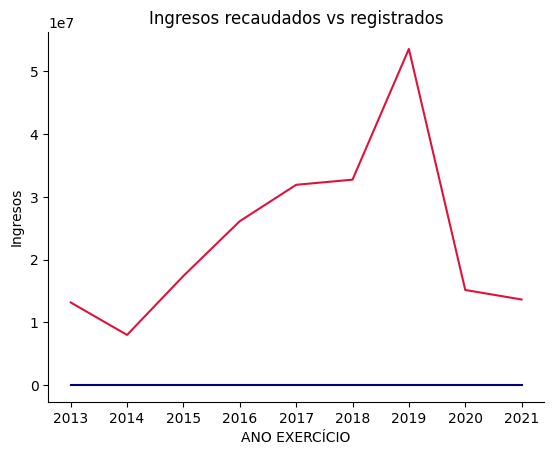

In [57]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_mujer, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Pesca y Acuicultura (Minist√©rio da Pesca e Aquicultura)* üêô

In [58]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Pesca e Aquicultura")

Los √≥rganos de los que se compone el Minist√©rio da Pesca e Aquicultura son: ['Minist√©rio da Pesca e Aquicultura - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Pesca e Aquicultura son: ['SECRETARIA EXECUTIVA-MPA']
Los ingresos entre 2013 y 2025 del Minist√©rio da Pesca e Aquicultura son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                           
Minist√©rio da Pesca e Aquicultura              40,939,194.00           0.00   

                                   VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                        
Minist√©rio da Pesca e Aquicultura    57,749,317.66                141.06   

                                   diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                        
Minist√©rio da Pesca e Aquicultura           57,749,317.66

In [59]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_pesca = fs.info_ministerio(datos_brasil, "Minist√©rio da Pesca e Aquicultura")
temporal_pesca

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00    21,467,329.48
2014                    0.00    14,830,883.37
2015                    0.00    12,849,797.23
2016                    0.00     8,601,307.58

In [60]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Pesca e Aquicultura")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                  
Minist√©rio da Pesca e Aquicultura - Unidades co... SECRETARIA EXECUTIVA-MPA              40,939,194.00   

                                                                             VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                      
Minist√©rio da Pesca e Aquicultura - Unidades co... SECRETARIA EXECUTIVA-MPA           0.00   

                                                                             VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                        
Minist√©rio da Pesca e Aquicultura - Unidades co... SECRETARIA EXECUTIVA-MPA    57,749,317.66   

                                                                             porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                              
Minist√©rio da Pesca e Aquicultura - Unidades co... SECRETARIA EXECUTIVA-MPA                  141.06

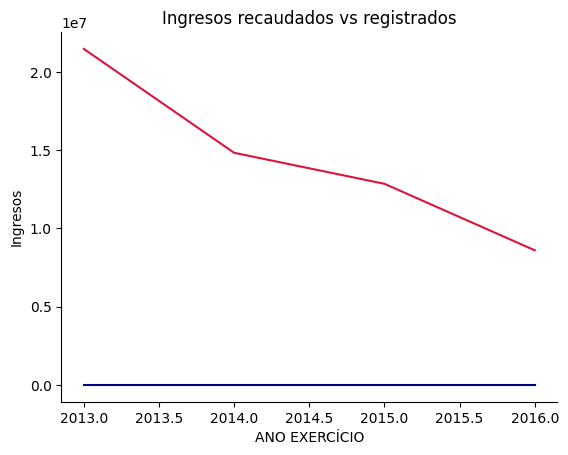

In [61]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_pesca, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Bienestar Social (Minist√©rio da Previd√™ncia Social)* üôå

In [62]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Previd√™ncia Social")

Los √≥rganos de los que se compone el Minist√©rio da Previd√™ncia Social son: ['Minist√©rio da Previd√™ncia Social - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Previd√™ncia Social son: ['COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE']
Los ingresos entre 2013 y 2025 del Minist√©rio da Previd√™ncia Social son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                          
Minist√©rio da Previd√™ncia Social              37,327,399.00           0.00   

                                  VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                       
Minist√©rio da Previd√™ncia Social    14,240,783.79                 38.15   

                                  diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                       
Minist√©rio da Previd√™ncia Social           14,240,783.79

In [63]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_bienestar = fs.info_ministerio(datos_brasil, "Minist√©rio da Previd√™ncia Social")
temporal_bienestar

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00       610,839.63
2014                    0.00     3,041,925.01
2015                    0.00    10,294,806.99
2016                    0.00       324,904.04
2017                    0.00       120,153.80
2018                    0.00      -151,845.68

In [64]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Previd√™ncia Social")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Minist√©rio da Previd√™ncia Social - Unidades com... COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE              37,327,399.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Minist√©rio da Previd√™ncia Social - Unidades com... COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE           0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Minist√©rio da Previd√™ncia Social - Unidades com... COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE    14,240,783.79   

                                                                                                  porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                   
Minist√©rio da Previd√™ncia Social - Unidades com... COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE                   38.15

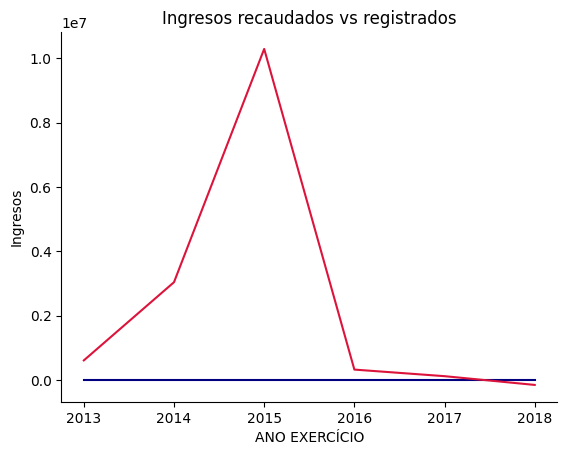

In [65]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_bienestar, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

In [71]:
datos_neg = datos_brasil[datos_brasil["NOME √ìRG√ÉO SUPERIOR"] == "Minist√©rio da Previd√™ncia Social"]

In [72]:
datos_neg[datos_neg["VALOR REALIZADO"] < 0]

C√ìDIGO √ìRG√ÉO SUPERIOR               NOME √ìRG√ÉO SUPERIOR  C√ìDIGO √ìRG√ÉO  \
167702                  33000  Minist√©rio da Previd√™ncia Social         33000   
167728                  33000  Minist√©rio da Previd√™ncia Social         33000   
542378                  33000  Minist√©rio da Previd√™ncia Social         33000   

                                               NOME √ìRG√ÉO  \
167702  Minist√©rio da Previd√™ncia Social - Unidades co...   
167728  Minist√©rio da Previd√™ncia Social - Unidades co...   
542378  Minist√©rio da Previd√™ncia Social - Unidades co...   

        C√ìDIGO UNIDADE GESTORA                           NOME UNIDADE GESTORA  \
167702                  330002  COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE   
167728                  330002  COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE   
542378                  330002  COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE   

       CATEGORIA ECON√îMICA             ORIGEM RECEITA  \
167702  Receitas Correntes  Outras Receitas Correntes   
167728  Receitas Correntes  Outras Receitas Correntes   
542378  Receitas Correntes        Receita de Servi√ßos   

                                     ESP√âCIE RECEITA  \
167702   Indeniza√ß√µes, restitui√ß√µes e ressarcimentos   
167728   Indeniza√ß√µes, restitui√ß√µes e ressarcimentos   
542378  Servi√ßos Administrativos e Comerciais Gerais   

                                         DETALHAMENTO  \
167702                  OUTRAS RESTITUICOES-PRINCIPAL   
167728  RESTIT.DE DESPESAS DE EXERC.ANTERIORES-PRINC.   
542378  INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL   

        VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  VALOR REALIZADO  \
167702                       0.00           0.00          -103.88   
167728                       0.00           0.00        -1,149.22   
542378                       0.00           0.00      -151,845.68   

        PERCENTUAL REALIZADO DATA LAN√áAMENTO  ANO EXERC√çCIO  
167702                  0.00      2016-04-01           2016  
167728                  0.00      2016-06-01           2016  
542378                  0.00      2018-11-01           2018

### *Ministerio de Sanidad (Minist√©rio da Sa√∫de)* üè•

In [66]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio da Sa√∫de")

Los √≥rganos de los que se compone el Minist√©rio da Sa√∫de son: ['Funda√ß√£o Nacional de Sa√∫de' 'Funda√ß√£o Oswaldo Cruz'
 'Hospital Nossa Senhora da Concei√ß√£o S.A.'
 'Minist√©rio da Sa√∫de - Unidades com v√≠nculo direto'
 'Ag√™ncia Nacional de Sa√∫de Suplementar'
 'Ag√™ncia Nacional de Vigil√¢ncia Sanit√°ria'
 'Hospital Cristo Redentor S.A.' 'Hospital F√™mina S.A.']
Las unidades gestoras que componen los √≥rganos del Minist√©rio da Sa√∫de son: ['FUNDACAO NACIONAL DE SAUDE - DF' 'FUNDACAO OSWALDO CRUZ'
 'HOSPITAL NOSSA SENHORA DA CONCEICAO S/A'
 'SPO-COORD.-GERAL DE ORC.E FINANCAS/MS'
 'AGENCIA NACIONAL DE SAUDE SUPLEMENTAR'
 'AGENCIA NACIONAL DE VIGILANCIA SANITARIA' 'HOSPITAL CRISTO REDENTOR S/A'
 'HOSPITAL FEMINA S/A' 'FUNDACAO NACIONAL DE SAUDE - PB'
 'FUNDACAO NACIONAL DE SAUDE - PA' 'FUNDACAO NACIONAL DE SAUDE - ES'
 'FUNDACAO NACIONAL DE SAUDE - AP' 'FUNDACAO NACIONAL DE SAUDE - MT']
Los ingresos entre 2013 y 2025 del Minist√©rio da Sa√∫de son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                             
Minist√©rio da Sa√∫de          46,656,321,844.00 125,949,190.83   

                      VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                           
Minist√©rio da Sa√∫de 37,786,245,892.63                 80.99   

                     diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                          
Minist√©rio da Sa√∫de       37,660,296,701.80

In [67]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_salud = fs.info_ministerio(datos_brasil, "Minist√©rio da Sa√∫de")
temporal_salud

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00 4,682,143,747.32
2014              127,089.75 5,387,250,309.17
2015           60,944,485.17 5,475,019,511.84
2016           60,965,088.48 5,716,043,926.94
2017              630,757.22 4,958,719,872.44
2018              642,376.39 4,164,185,250.48
2019              655,110.16 3,460,404,449.33
2020            1,315,852.55 2,037,371,788.43
2021              668,431.11 1,905,107,036.68

In [68]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio da Sa√∫de")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                        NOME UNIDADE GESTORA                                                  
Ag√™ncia Nacional de Sa√∫de Suplementar             AGENCIA NACIONAL DE SAUDE SUPLEMENTAR              3,500,851,272.00   
Ag√™ncia Nacional de Vigil√¢ncia Sanit√°ria          AGENCIA NACIONAL DE VIGILANCIA SANITARIA           3,287,473,477.00   
Funda√ß√£o Nacional de Sa√∫de                        FUNDACAO NACIONAL DE SAUDE - AP                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - DF                    1,156,174,237.00   
                                                  FUNDACAO NACIONAL DE SAUDE - ES                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - MT                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - PA                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - PB                                0.00   
Funda√ß√£o Oswaldo Cruz                             FUNDACAO OSWALDO CRUZ                                616,410,856.00   
Hospital Cristo Redentor S.A.                     HOSPITAL CRISTO REDENTOR S/A                                   0.00   
Hospital F√™mina S.A.                              HOSPITAL FEMINA S/A                                            0.00   
Hospital Nossa Senhora da Concei√ß√£o S.A.          HOSPITAL NOSSA SENHORA DA CONCEICAO S/A               63,073,375.00   
Minist√©rio da Sa√∫de - Unidades com v√≠nculo direto SPO-COORD.-GERAL DE ORC.E FINANCAS/MS             38,032,338,627.00   

                                                                                            VALOR LAN√áADO  \
NOME √ìRG√ÉO                                        NOME UNIDADE GESTORA                                      
Ag√™ncia Nacional de Sa√∫de Suplementar             AGENCIA NACIONAL DE SAUDE SUPLEMENTAR    120,701,432.10   
Ag√™ncia Nacional de Vigil√¢ncia Sanit√°ria          AGENCIA NACIONAL DE VIGILANCIA SANITARIA   1,649,402.73   
Funda√ß√£o Nacional de Sa√∫de                        FUNDACAO NACIONAL DE SAUDE - AP              472,230.64   
                                                  FUNDACAO NACIONAL DE SAUDE - DF                    0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - ES               45,852.48   
                                                  FUNDACAO NACIONAL DE SAUDE - MT               23,416.56   
                                                  FUNDACAO NACIONAL DE SAUDE - PA            3,017,490.24   
                                                  FUNDACAO NACIONAL DE SAUDE - PB               39,366.08   
Funda√ß√£o Oswaldo Cruz                             FUNDACAO OSWALDO CRUZ                              0.00   
Hospital Cristo Redentor S.A.                     HOSPITAL CRISTO REDENTOR S/A                       0.00   
Hospital F√™mina S.A.                              HOSPITAL FEMINA S/A                                0.00   
Hospital Nossa Senhora da Concei√ß√£o S.A.          HOSPITAL NOSSA SENHORA DA CONCEICAO S/A            0.00   
Minist√©rio da Sa√∫de - Unidades com v√≠nculo direto SPO-COORD.-GERAL DE ORC.E FINANCAS/MS              0.00   

                                                                                             VALOR REALIZADO  \
NOME √ìRG√ÉO                                        NOME UNIDADE GESTORA                                         
Ag√™ncia Nacional de Sa√∫de Suplementar             AGENCIA NACIONAL DE SAUDE SUPLEMENTAR     3,706,518,696.11   
Ag√™ncia Nacional de Vigil√¢ncia Sanit√°ria          AGENCIA NACIONAL DE VIGILANCIA SANITARIA  3,663,356,515.53   
Funda√ß√£o Nacional de Sa√∫de                        FUNDACAO NACIONAL DE SAUDE - AP                       0.00   
                                 

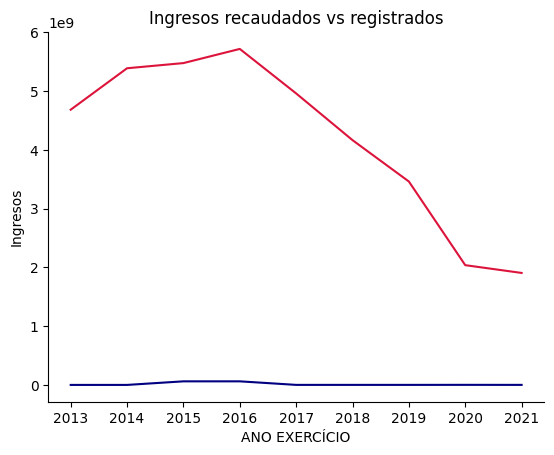

In [69]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_salud, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Comunicaciones (Minist√©rio das Comunica√ß√µes)* üì¢

In [70]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio das Comunica√ß√µes")

Los √≥rganos de los que se compone el Minist√©rio das Comunica√ß√µes son: ['Minist√©rio das Comunica√ß√µes - Unidades com v√≠nculo direto'
 'Empresa Brasil de Comunica√ß√£o' 'Ag√™ncial Nacional de Telecomunica√ß√µes'
 'Fundo de Universaliza√ß√£o dos Servi√ßos de Telecomunica√ß√µes'
 'Fundo para o Desenvolvimento Tecnol√≥gico das Telecomunica√ß√µes'
 'TELECOMUNICACOES BRASILEIRAS S/A']
Las unidades gestoras que componen los √≥rganos del Minist√©rio das Comunica√ß√µes son: ['COORDENACAO-GERAL DE ORCAMENTO E FINANCAS'
 'EMPRESA BRASIL DE COMUNICACAO S.A'
 'AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE'
 'FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES'
 'FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES'
 'COORDENACAO-GERAL DE RECURSOS LOGISTICOS'
 'TELECOMUNICACOES BRASILEIRAS S/A']
Los ingresos entre 2013 y 2025 del Minist√©rio das Comunica√ß√µes son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                     
Minist√©rio das Comunica√ß√µes          50,303,390,042.00      11,831.64   

                              VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                   
Minist√©rio das Comunica√ß√µes 40,047,759,133.20                 79.61   

                             diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                  
Minist√©rio das Comunica√ß√µes       40,047,747,301.56

In [71]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_comunicaciones = fs.info_ministerio(datos_brasil, "Minist√©rio das Comunica√ß√µes")
temporal_comunicaciones

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00 5,153,572,668.12
2014                    0.00 5,755,592,011.29
2015                5,915.82 5,870,302,865.73
2016                5,915.82 5,339,375,630.76
2017                    0.00 4,671,806,312.39
2018                    0.00 5,384,205,199.05
2019                    0.00 3,359,414,370.75
2020                    0.00 2,385,114,151.75
2021                    0.00 2,128,375,923.36

In [72]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio das Comunica√ß√µes")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                      
Ag√™ncial Nacional de Telecomunica√ß√µes              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE             23,778,289,418.00   
Empresa Brasil de Comunica√ß√£o                      EMPRESA BRASIL DE COMUNICACAO S.A                      2,598,708,867.00   
Fundo de Universaliza√ß√£o dos Servi√ßos de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES            17,637,808,105.00   
Fundo para o Desenvolvimento Tecnol√≥gico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES           4,280,588,000.00   
Minist√©rio das Comunica√ß√µes - Unidades com v√≠nc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS                755,135,433.00   
                                                   COORDENACAO-GERAL DE RECURSOS LOGISTICOS                           0.00   
TELECOMUNICACOES BRASILEIRAS S/A                   TELECOMUNICACOES BRASILEIRAS S/A                       1,252,860,219.00   

                                                                                                 VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                          
Ag√™ncial Nacional de Telecomunica√ß√µes              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE              0.00   
Empresa Brasil de Comunica√ß√£o                      EMPRESA BRASIL DE COMUNICACAO S.A                      0.00   
Fundo de Universaliza√ß√£o dos Servi√ßos de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES             0.00   
Fundo para o Desenvolvimento Tecnol√≥gico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES           0.00   
Minist√©rio das Comunica√ß√µes - Unidades com v√≠nc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS              0.00   
                                                   COORDENACAO-GERAL DE RECURSOS LOGISTICOS          11,831.64   
TELECOMUNICACOES BRASILEIRAS S/A                   TELECOMUNICACOES BRASILEIRAS S/A                       0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Ag√™ncial Nacional de Telecomunica√ß√µes              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE    18,018,890,765.26   
Empresa Brasil de Comunica√ß√£o                      EMPRESA BRASIL DE COMUNICACAO S.A             4,116,687,398.08   
Fundo de Universaliza√ß√£o dos Servi√ßos de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES   12,462,683,595.49   
Fundo para o Desenvolvimento Tecnol√≥gico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES  4,844,932,795.59   
Minist√©rio das Comunica√ß√µes - Unidades com v√≠nc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS        36,810,701.67   
                                                   COORDENACAO-GERAL DE RECURSOS LOGISTICOS                  0.00   
TELECOMUNICACOES BRASILEIRAS S/A                   TELECOMUNICACOES BRASILEIRAS S/A                567,753,877.11   

                                                                                                 porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                  
Ag√™ncial Nacional de Telecomunica√ß√µes              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE                      75.78  
Empresa Brasil de Comunica√ß√£o                      EMPRESA BRASIL DE COMUNICACAO S.A                             158.41  
Fundo de Universaliza√ß√£o dos Servi√ßos de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES                     70.66  
Fundo para o Desenvolvimento Tecnol√≥gico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES                  113.18  
Minist√©rio das Comunica√ß√µes - Unidades com v√≠nc... COORDENACAO-GERAL DE ORCAMENTO E FINA

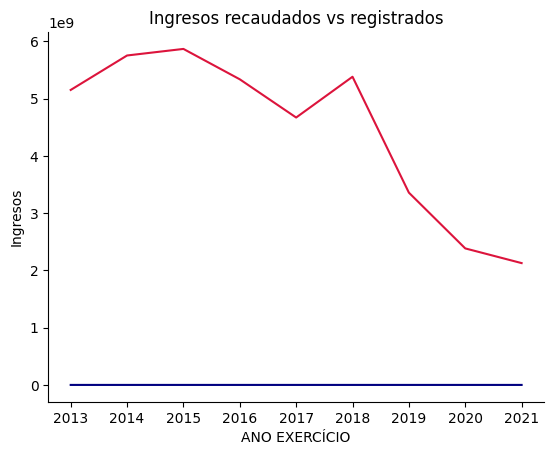

In [73]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_comunicaciones, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Igualdad Racial (Igualdade Racial)*  üë´

In [74]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio das Mulheres, Igualdade Racial, da")

Los √≥rganos de los que se compone el Minist√©rio das Mulheres, Igualdade Racial, da son: ['Fundo Nacional do Idoso' 'Fundo Nacional para a Crian√ßa e o Adolescente']
Las unidades gestoras que componen los √≥rganos del Minist√©rio das Mulheres, Igualdade Racial, da son: ['FUNDO NACIONAL DO IDOSO' 'FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE'
 'FUNDO NACIONAL DO IDOSO - SET.ORC/FIN'
 'FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN']
Los ingresos entre 2013 y 2025 del Minist√©rio das Mulheres, Igualdade Racial, da son: 



VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                        
Minist√©rio das Mulheres, Igualdade Racial, da             109,699,610.00   

                                               VALOR LAN√áADO  VALOR REALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                             
Minist√©rio das Mulheres, Igualdade Racial, da           0.00   136,845,774.52   

                                               porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                   
Minist√©rio das Mulheres, Igualdade Racial, da                124.75   

                                               diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                                    
Minist√©rio das Mulheres, Igualdade Racial, da          136,845,774.52

In [75]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_ig_racial = fs.info_ministerio(datos_brasil, "Minist√©rio das Mulheres, Igualdade Racial, da")
temporal_ig_racial

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00    20,660,063.80
2014                    0.00    28,694,700.01
2015                    0.00    44,371,022.78
2016                    0.00    41,557,964.30
2017                    0.00     1,559,532.86
2018                    0.00            67.41
2019                    0.00           247.81
2020                    0.00         1,345.86
2021                    0.00           829.69

In [76]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio das Mulheres, Igualdade Racial, da")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                    NOME UNIDADE GESTORA                                                       
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                                    25,765,942.00   
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN                               0.00   
Fundo Nacional para a Crian√ßa e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN                       0.00   
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE              83,933,668.00   

                                                                                             VALOR LAN√áADO  \
NOME √ìRG√ÉO                                    NOME UNIDADE GESTORA                                           
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                                 0.00   
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN                   0.00   
Fundo Nacional para a Crian√ßa e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN           0.00   
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE           0.00   

                                                                                             VALOR REALIZADO  \
NOME √ìRG√ÉO                                    NOME UNIDADE GESTORA                                             
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                          52,372,257.77   
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN               751,493.26   
Fundo Nacional para a Crian√ßa e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN     1,605,014.13   
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE    82,117,009.36   

                                                                                             porcentaje_recaudacion  
NOME √ìRG√ÉO                                    NOME UNIDADE GESTORA                                                   
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                                        203.26  
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN                             inf  
Fundo Nacional para a Crian√ßa e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN                     inf  
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE                   97.84

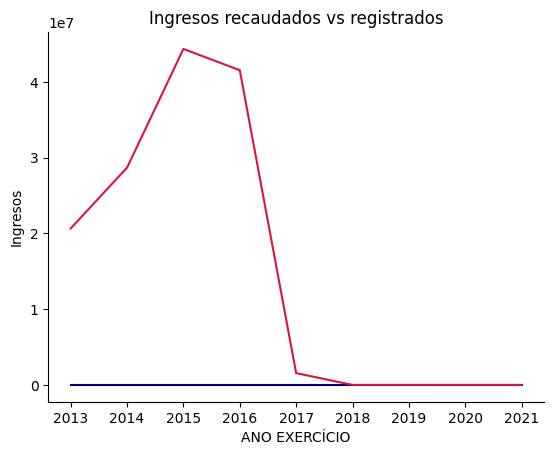

In [77]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_ig_racial, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Asuntos Exteriores (Minist√©rio das Rela√ß√µes Exteriores)* üåé

In [78]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio das Rela√ß√µes Exteriores")

Los √≥rganos de los que se compone el Minist√©rio das Rela√ß√µes Exteriores son: ['Minist√©rio das Rela√ß√µes Exteriores - Unidades com v√≠nculo direto'
 'Funda√ß√£o Alexandre de Gusm√£o']
Las unidades gestoras que componen los √≥rganos del Minist√©rio das Rela√ß√µes Exteriores son: ['COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE'
 'FUNDACAO ALEXANDRE DE GUSMAO' 'MRE - DIFERENCA CAMBIAL']
Los ingresos entre 2013 y 2025 del Minist√©rio das Rela√ß√µes Exteriores son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                            
Minist√©rio das Rela√ß√µes Exteriores           5,328,738,148.00           0.00   

                                    VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                         
Minist√©rio das Rela√ß√µes Exteriores 2,931,914,529.32                 55.02   

                                    diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                         
Minist√©rio das Rela√ß√µes Exteriores        2,931,914,529.32

In [79]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_relext = fs.info_ministerio(datos_brasil, "Minist√©rio das Rela√ß√µes Exteriores")
temporal_relext

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00   307,066,929.91
2014                    0.00   381,992,502.88
2015                    0.00   450,084,830.34
2016                    0.00   456,721,220.46
2017                    0.00   482,170,476.30
2018                    0.00   296,119,881.60
2019                    0.00   259,165,132.61
2020                    0.00   161,059,565.28
2021                    0.00   137,533,989.94

In [80]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio das Rela√ß√µes Exteriores")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Funda√ß√£o Alexandre de Gusm√£o                       FUNDACAO ALEXANDRE DE GUSMAO                               12,532,684.00   
Minist√©rio das Rela√ß√µes Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE           5,316,205,464.00   
                                                   MRE - DIFERENCA CAMBIAL                                             0.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Funda√ß√£o Alexandre de Gusm√£o                       FUNDACAO ALEXANDRE DE GUSMAO                            0.00   
Minist√©rio das Rela√ß√µes Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE           0.00   
                                                   MRE - DIFERENCA CAMBIAL                                 0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Funda√ß√£o Alexandre de Gusm√£o                       FUNDACAO ALEXANDRE DE GUSMAO                        980,057.53   
Minist√©rio das Rela√ß√µes Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE 2,931,125,467.78   
                                                   MRE - DIFERENCA CAMBIAL                            -190,995.99   

                                                                                                  porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                   
Funda√ß√£o Alexandre de Gusm√£o                       FUNDACAO ALEXANDRE DE GUSMAO                                     7.82  
Minist√©rio das Rela√ß√µes Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE                   55.14  
                                                   MRE - DIFERENCA CAMBIAL                                          -inf

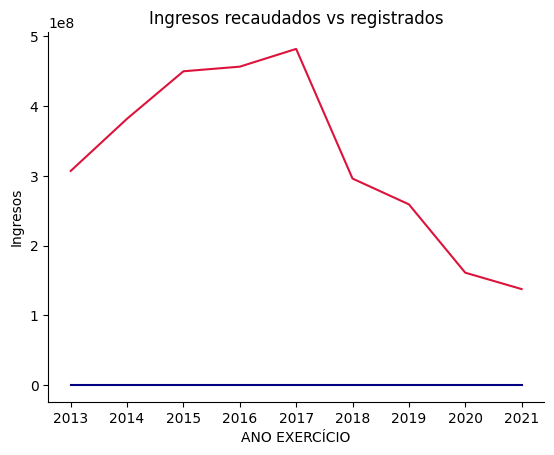

In [81]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_relext, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

In [23]:
datos_brasil.columns

Index(['C√ìDIGO √ìRG√ÉO SUPERIOR', 'NOME √ìRG√ÉO SUPERIOR', 'C√ìDIGO √ìRG√ÉO',
       'NOME √ìRG√ÉO', 'C√ìDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECON√îMICA', 'ORIGEM RECEITA', 'ESP√âCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LAN√áADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LAN√áAMENTO',
       'ANO EXERC√çCIO'],
      dtype='object')

In [32]:
min_ext = datos_brasil[datos_brasil["NOME √ìRG√ÉO SUPERIOR"] == "Minist√©rio das Rela√ß√µes Exteriores"]
neg_ext = min_ext[min_ext["VALOR REALIZADO"] < 0]
print("Son todo ingresos corrientes que son lo siguiente: \n")
print(f"{neg_ext["ESP√âCIE RECEITA"].unique()} \n") 
print(neg_ext["DETALHAMENTO"].unique())

Son todo ingresos corrientes que son lo siguiente: 

['Receitas Correntes - a classificar'
 'Explora√ß√£o do patrim√¥nio imobili√°rio do Estad'
 'Servi√ßos Administrativos e Comerciais Gerais' 'Taxas'
 'Indeniza√ß√µes, restitui√ß√µes e ressarcimentos'] 

['Receitas Correntes - a classificar' 'ALUGUEIS E ARRENDAMENTOS-PRINCIPAL'
 'INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL'
 'TAXAS INSPECAO,CONTROLE E FISCALIZACAO-PRINC.'
 'SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.'
 'TAXAS INSPE√á√ÉO,CONTROLE E FISCALIZA√á√ÉO-PRINC.'
 'REST.DESPESAS EXERC.ANT.FIN.FTE.PRIM.-PRINC.'
 'RESTIT.DESP.PRIMARIAS EX.ANTERIORES-MUL.JUR.'
 'RESTIT.DESP.PRIMARIAS EX.ANTERIORES-PRINC.']


### *Ministerio de Minas y Energ√≠a (Minist√©rio de Minas e Energia)* üîã

In [82]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio de Minas e Energia")

Los √≥rganos de los que se compone el Minist√©rio de Minas e Energia son: ['Ind√∫strias Nucleares do Brasil'
 'Companhia de Pesquisa de Recursos Minerais'
 'Minist√©rio de Minas e Energia - Unidades com v√≠nculo direto'
 'Ag√™ncia Nacional do Petr√≥leo, G√°s Natural e Biocombust√≠veis'
 'Departamento Nacional de Produ√ß√£o Mineral'
 'Ag√™ncia Nacional de Energia El√©trica' 'Empresa de Pesquisa Energ√©tica'
 'Nuclebr√°s Equipamentos Pesados S.A.' 'Ag√™ncia Nacional de Minera√ß√£o']
Las unidades gestoras que componen los √≥rganos del Minist√©rio de Minas e Energia son: ['INDUSTRIAS NUCLEARES DO BRASIL S/A - INB'
 'COMPANHIA DE PESQUISA DE RECURSOS MINERAIS'
 'COORD.GERAL DE ORCAM.E FIN./M.M.E'
 'AG. NAC.DO PETROLEO GAS NAT.E BIOCOM'
 'DEPARTAMENTO NAC. DE PRODUCAO MINERAL - SEDE'
 'AGENCIA NACIONAL DE ENERGIA ELETRICA' 'EMPRESA DE PESQUISA ENERGETICA'
 'NUCLEBRAS EQUIPAMENTOS PESADOS S/A-NUCLEP'
 'SETORIAL ORCAMENTARIA E FINANCEIRA - ANM']
Los ingresos entre 2013 y 2025 del Minist√©rio d

VALOR PREVISTO ATUALIZADO     VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                          
Minist√©rio de Minas e Energia         354,233,973,334.00 13,136,233,568.97   

                                 VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                      
Minist√©rio de Minas e Energia 191,485,924,485.02                 54.06   

                               diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                    
Minist√©rio de Minas e Energia      178,349,690,916.05

In [83]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_minas = fs.info_ministerio(datos_brasil, "Minist√©rio de Minas e Energia")
temporal_minas

VALOR LAN√áADO   VALOR REALIZADO
ANO EXERC√çCIO                                   
2013             37,579,566.54  6,517,642,399.91
2014             39,775,761.82  5,735,356,458.86
2015             46,453,005.21  6,657,784,148.73
2016             49,597,862.63 24,617,041,919.67
2017          1,844,122,410.62 19,130,324,500.08
2018          1,803,187,320.79  8,202,188,763.94
2019          1,803,187,320.79 95,297,991,927.34
2020          4,657,758,820.68 11,309,673,231.19
2021          2,854,571,499.89 14,017,921,135.30

In [84]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio de Minas e Energia")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                      
Ag√™ncia Nacional de Energia El√©trica               AGENCIA NACIONAL DE ENERGIA ELETRICA                  14,090,143,180.00   
Ag√™ncia Nacional de Minera√ß√£o                      SETORIAL ORCAMENTARIA E FINANCEIRA - ANM               7,217,378,410.00   
Ag√™ncia Nacional do Petr√≥leo, G√°s Natural e Bio... AG. NAC.DO PETROLEO GAS NAT.E BIOCOM                  47,759,269,587.00   
Companhia de Pesquisa de Recursos Minerais         COMPANHIA DE PESQUISA DE RECURSOS MINERAIS             2,419,409,085.00   
Departamento Nacional de Produ√ß√£o Mineral          DEPARTAMENTO NAC. DE PRODUCAO MINERAL - SEDE           1,965,641,425.00   
Empresa de Pesquisa Energ√©tica                     EMPRESA DE PESQUISA ENERGETICA                           120,787,427.00   
Ind√∫strias Nucleares do Brasil                     INDUSTRIAS NUCLEARES DO BRASIL S/A - INB               5,274,338,213.00   
Minist√©rio de Minas e Energia - Unidades com v√≠... COORD.GERAL DE ORCAM.E FIN./M.M.E                    274,634,469,161.00   
Nuclebr√°s Equipamentos Pesados S.A.                NUCLEBRAS EQUIPAMENTOS PESADOS S/A-NUCLEP                752,536,846.00   

                                                                                                   VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                            
Ag√™ncia Nacional de Energia El√©trica               AGENCIA NACIONAL DE ENERGIA ELETRICA         7,660,721,898.08   
Ag√™ncia Nacional de Minera√ß√£o                      SETORIAL ORCAMENTARIA E FINANCEIRA - ANM     5,470,469,349.32   
Ag√™ncia Nacional do Petr√≥leo, G√°s Natural e Bio... AG. NAC.DO PETROLEO GAS NAT.E BIOCOM                     0.00   
Companhia de Pesquisa de Recursos Minerais         COMPANHIA DE PESQUISA DE RECURSOS MINERAIS       5,042,321.57   
Departamento Nacional de Produ√ß√£o Mineral          DEPARTAMENTO NAC. DE PRODUCAO MINERAL - SEDE             0.00   
Empresa de Pesquisa Energ√©tica                     EMPRESA DE PESQUISA ENERGETICA                           0.00   
Ind√∫strias Nucleares do Brasil                     INDUSTRIAS NUCLEARES DO BRASIL S/A - INB                 0.00   
Minist√©rio de Minas e Energia - Unidades com v√≠... COORD.GERAL DE ORCAM.E FIN./M.M.E                        0.00   
Nuclebr√°s Equipamentos Pesados S.A.                NUCLEBRAS EQUIPAMENTOS PESADOS S/A-NUCLEP                0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Ag√™ncia Nacional de Energia El√©trica               AGENCIA NACIONAL DE ENERGIA ELETRICA         61,093,095,412.38   
Ag√™ncia Nacional de Minera√ß√£o                      SETORIAL ORCAMENTARIA E FINANCEIRA - ANM     21,041,550,743.49   
Ag√™ncia Nacional do Petr√≥leo, G√°s Natural e Bio... AG. NAC.DO PETROLEO GAS NAT.E BIOCOM         90,904,481,263.39   
Companhia de Pesquisa de Recursos Minerais         COMPANHIA DE PESQUISA DE RECURSOS MINERAIS       37,218,062.34   
Departamento Nacional de Produ√ß√£o Mineral          DEPARTAMENTO NAC. DE PRODUCAO MINERAL - SEDE  9,727,062,978.45   
Empresa de Pesquisa Energ√©tica                     EMPRESA DE PESQUISA ENERGETICA                   19,890,457.70   
Ind√∫strias Nucleares do Brasil                     INDUSTRIAS NUCLEARES DO BRASIL S/A - INB      4,954,913,678.70   
Minist√©rio de Minas e Energia - Unidades com v√≠... COORD.GERAL DE ORCAM.E FIN./M.M.E             3,413,116,800.09   
Nuclebr√°s Equipamentos Pesados S.A.                NUCLEBRAS EQUIPAMENTOS PESADOS S/A-NUCLEP       294,595,088.48   

                                                                                             

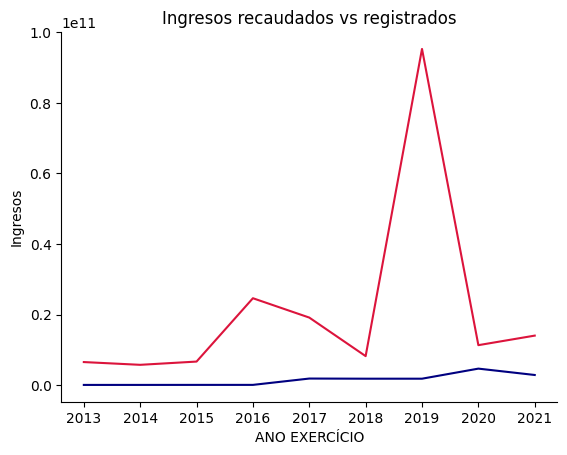

In [85]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_minas, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Desarrollo Agrario (Minist√©rio do Desenvolvimento Agr√°rio)* üåæ

In [86]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio do Desenvolvimento Agr√°rio")

Los √≥rganos de los que se compone el Minist√©rio do Desenvolvimento Agr√°rio son: ['Minist√©rio do Desenvolvimento Agr√°rio - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Minist√©rio do Desenvolvimento Agr√°rio son: ['SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO']
Los ingresos entre 2013 y 2025 del Minist√©rio do Desenvolvimento Agr√°rio son: 



VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                
Minist√©rio do Desenvolvimento Agr√°rio             558,355,581.00   

                                       VALOR LAN√áADO  VALOR REALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                     
Minist√©rio do Desenvolvimento Agr√°rio           0.00   514,953,670.74   

                                       porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                           
Minist√©rio do Desenvolvimento Agr√°rio                 92.23   

                                       diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                            
Minist√©rio do Desenvolvimento Agr√°rio          514,953,670.74

In [87]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_agrario = fs.info_ministerio(datos_brasil, "Minist√©rio do Desenvolvimento Agr√°rio")
temporal_agrario

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00    92,949,640.41
2014                    0.00   129,068,487.07
2015                    0.00   133,677,714.53
2016                    0.00   110,673,046.54
2017                    0.00    48,584,782.19

In [88]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio do Desenvolvimento Agr√°rio")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Minist√©rio do Desenvolvimento Agr√°rio - Unidade... SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO             558,355,581.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Minist√©rio do Desenvolvimento Agr√°rio - Unidade... SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO           0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Minist√©rio do Desenvolvimento Agr√°rio - Unidade... SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO   514,953,670.74   

                                                                                                  porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                   
Minist√©rio do Desenvolvimento Agr√°rio - Unidade... SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO                   92.23

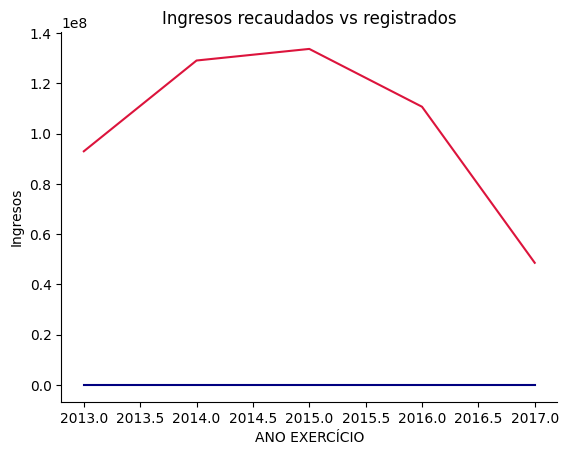

In [89]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_agrario, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Integraci√≥n y Desarrollo Regional (Minist√©rio da Integra√ß√£o Desenvolvimento Regional)*

In [90]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio do Desenvolvimento Regional")

Los √≥rganos de los que se compone el Minist√©rio do Desenvolvimento Regional son: ['Empresa de Trens Urbanos de Porto Alegre'
 'Companhia Brasileira de Trens Urbanos'
 'Fundo Constitucional de Financiamento do Centro-Oeste'
 'Fundo Constitucional de Financiamento do Norte'
 'Fundo Constitucional de Financiamento do Nordeste'
 'Departamento Nacional de Obras Contra as Secas'
 'Companhia de Desenvolvimento dos Vales do S√£o Francisco e do Parna√≠ba'
 'Minist√©rio do Desenvolvimento Regional - Unidades com v√≠nculo direto'
 'Superintend√™ncia do Desenvolvimento da Amaz√¥nia'
 'Fundo de Desenvolvimento da Amaz√¥nia'
 'Fundo Nacional de Habita√ß√£o de Interesse Social'
 'Superintend√™ncia do Desenvolvimento do Nordeste'
 'Ag√™ncia Nacional de √Åguas' 'Ag√™ncia de Desenvolvimento da Amaz√¥nia'
 'Superintend√™ncia de Desenvolvimento do Centro-Oeste'
 'Fundo de Desenvolvimento do Nordeste'
 'Fundo de Desenvolvimento do Centro-Oeste']
Las unidades gestoras que componen los √≥rganos del Minist√

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                 
Minist√©rio do Desenvolvimento Regional         125,967,254,487.00   

                                        VALOR LAN√áADO   VALOR REALIZADO  \
NOME √ìRG√ÉO SUPERIOR                                                       
Minist√©rio do Desenvolvimento Regional           0.00 19,356,487,150.32   

                                        porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                            
Minist√©rio do Desenvolvimento Regional                 15.37   

                                        diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                             
Minist√©rio do Desenvolvimento Regional       19,356,487,150.32

In [91]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_integraci√≥n = fs.info_ministerio(datos_brasil, "Minist√©rio do Desenvolvimento Regional")
temporal_integraci√≥n

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00 1,450,938,856.61
2014                    0.00 1,730,734,116.78
2015                    0.00 1,876,107,677.71
2016                    0.00 2,062,404,013.95
2017                    0.00 2,323,570,078.80
2018                    0.00 2,002,641,331.44
2019                    0.00 2,294,174,395.49
2020                    0.00 3,535,217,999.47
2021                    0.00 2,080,698,680.07

In [92]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio do Desenvolvimento Regional")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Ag√™ncia Nacional de √Åguas                          COORDENACAO DE ORCAMENTO E FINANCAS.                    2,742,042,242.00   
Ag√™ncia de Desenvolvimento da Amaz√¥nia             AGENCIA DE DESENVOLVIMENTO DA AMAZONIA                              0.00   
Companhia Brasileira de Trens Urbanos              CIA BRASILEIRA DE TRENS URBANOS-ADM.CENTRAL             2,033,300,943.00   
Companhia de Desenvolvimento dos Vales do S√£o F... CIA DE DES.DOS VALES DO S.FRANC.E DO PARNAIBA             911,861,976.00   
Departamento Nacional de Obras Contra as Secas     DEPARTAMENTO NAC. DE OBRAS CONTRA AS SECAS/UO             455,719,005.00   
Empresa de Trens Urbanos de Porto Alegre           EMPRESA DE TRENS URBANOS DE PORTO ALEGRE S/A            1,205,667,469.00   
Fundo Constitucional de Financiamento do Centro... FUNDO CONSTITUCIONL DO CENTRO OESTE                    21,475,973,213.00   
Fundo Constitucional de Financiamento do Nordeste  FUNDO CONSTITUCIONAL DE FINANCIAM.DO NORDESTE          64,427,919,612.00   
Fundo Constitucional de Financiamento do Norte     FUNDO CONSTITUCIONAL FINANCIAMENTO NORTE               21,475,973,214.00   
Fundo Nacional de Habita√ß√£o de Interesse Social    FUNDO NACIONAL DE HABIT. DE INTERESSE SOCIAL              746,089,692.00   
Fundo de Desenvolvimento da Amaz√¥nia               FUNDO DE DESENVOLVIMENTO DA AMAZONIA                    3,226,401,055.00   
Fundo de Desenvolvimento do Centro-Oeste           FUNDO DE DESENVOLVIMENTO DO CENTRO-OESTE                  807,287,426.00   
Fundo de Desenvolvimento do Nordeste               FUNDO DE DESENVOLVIMENTO DO NORDESTE                    4,106,733,757.00   
Minist√©rio do Desenvolvimento Regional - Unidad... ORCAMENTO E FINANCAS/MDR                                1,757,274,788.00   
                                                   SECRETARIA EXECUTIVA - MINISTERIO DAS CIDADES              55,488,504.00   
Superintend√™ncia de Desenvolvimento do Centro-O... SUPERINT. DO DESENVOLVIMENTO DO CENTRO-OESTE               58,977,219.00   
Superintend√™ncia do Desenvolvimento da Amaz√¥nia    SUPERINTEND. DO DESENVOLVIMENTO DA AMAZONIA               143,175,917.00   
Superintend√™ncia do Desenvolvimento do Nordeste    SUPERINTENDENCIA DO DESENVOLV. DO NORDESTE                337,368,455.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Ag√™ncia Nacional de √Åguas                          COORDENACAO DE ORCAMENTO E FINANCAS.                    0.00   
Ag√™ncia de Desenvolvimento da Amaz√¥nia             AGENCIA DE DESENVOLVIMENTO DA AMAZONIA                  0.00   
Companhia Brasileira de Trens Urbanos              CIA BRASILEIRA DE TRENS URBANOS-ADM.CENTRAL             0.00   
Companhia de Desenvolvimento dos Vales do S√£o F... CIA DE DES.DOS VALES DO S.FRANC.E DO PARNAIBA           0.00   
Departamento Nacional de Obras Contra as Secas     DEPARTAMENTO NAC. DE OBRAS CONTRA AS SECAS/UO           0.00   
Empresa de Trens Urbanos de Porto Alegre           EMPRESA DE TRENS URBANOS DE PORTO ALEGRE S/A            0.00   
Fundo Constitucional de Financiamento do Centro... FUNDO CONSTITUCIONL DO CENTRO OESTE                     0.00   
Fundo Constitucional de Financiamento do Nordeste  FUNDO CONSTITUCIONAL DE FINANCIAM.DO NORDESTE           0.00   
Fundo Constitucional de Financiamento do Norte     FUNDO CONSTITUCIONAL FINANCIAMENTO NORTE                0.00   
Fundo Nacional de Habita√ß√£o de Interesse Social    FUNDO NACIONAL DE HABIT. DE INTERESSE SOCIAL            0.00   
Fundo de Desenvolvimento da Amaz√¥nia               FUNDO DE DESENVOLVIMENTO DA AMAZONIA                    0.00   
Fundo de Desenvolvimento do Centro-O

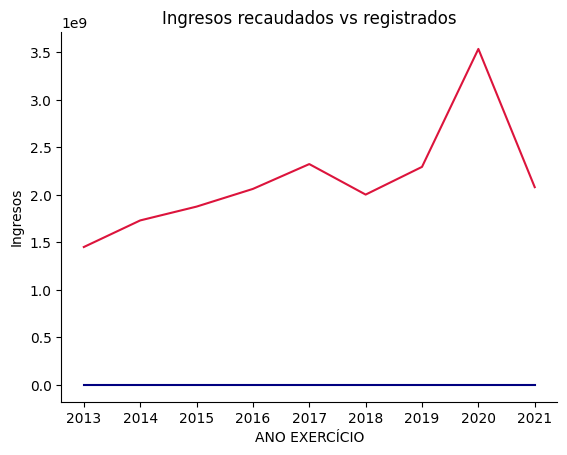

In [93]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_integraci√≥n, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Deportes (Minist√©rio do Esporte)* üèÉ

In [94]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio do Esporte")

Los √≥rganos de los que se compone el Minist√©rio do Esporte son: ['Autoridade P√∫blica Ol√≠mpica']
Las unidades gestoras que componen los √≥rganos del Minist√©rio do Esporte son: ['AUTORIDADE PUBLICA OLIMPICA']
Los ingresos entre 2013 y 2025 del Minist√©rio do Esporte son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                               
Minist√©rio do Esporte             120,909,686.40           0.00   

                       VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                            
Minist√©rio do Esporte    53,896,237.79                 44.58   

                       diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                            
Minist√©rio do Esporte           53,896,237.79

In [95]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_deporte = fs.info_ministerio(datos_brasil, "Minist√©rio do Esporte")
temporal_deporte

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00     9,064,213.02
2014                    0.00    18,604,642.00
2015                    0.00    10,257,988.03
2016                    0.00     7,640,475.44
2017                    0.00     4,854,998.65
2018                    0.00     3,473,921.47
2019                    0.00            -0.82

In [96]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio do Esporte")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                  NOME UNIDADE GESTORA                                     
Autoridade P√∫blica Ol√≠mpica AUTORIDADE PUBLICA OLIMPICA             120,909,686.40   

                                                         VALOR LAN√áADO  \
NOME √ìRG√ÉO                  NOME UNIDADE GESTORA                         
Autoridade P√∫blica Ol√≠mpica AUTORIDADE PUBLICA OLIMPICA           0.00   

                                                         VALOR REALIZADO  \
NOME √ìRG√ÉO                  NOME UNIDADE GESTORA                           
Autoridade P√∫blica Ol√≠mpica AUTORIDADE PUBLICA OLIMPICA    53,896,237.79   

                                                         porcentaje_recaudacion  
NOME √ìRG√ÉO                  NOME UNIDADE GESTORA                                 
Autoridade P√∫blica Ol√≠mpica AUTORIDADE PUBLICA OLIMPICA                   44.58

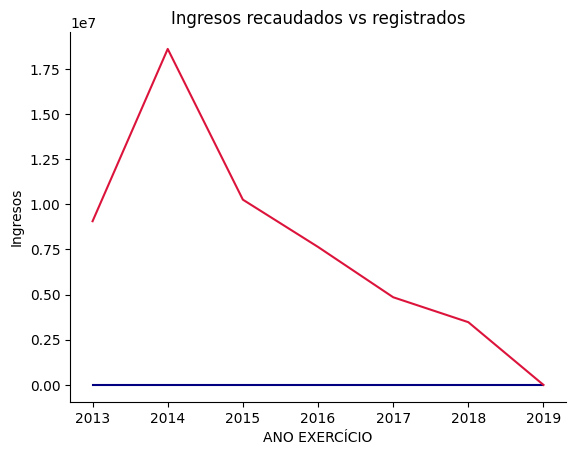

In [97]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_deporte, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Medio Ambiente y Cambio Clim√°tico (Minist√©rio do Meio Ambiente e Mudan√ßa do Clima)*

In [98]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio do Meio Ambiente")

Los √≥rganos de los que se compone el Minist√©rio do Meio Ambiente son: ['Instituto de Pesquisas Jardim Bot√¢nico do Rio de Janeiro'
 'Minist√©rio do Meio Ambiente - Unidades com v√≠nculo direto'
 'Fundo Nacional sobre Mudan√ßa no Clima'
 'Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renov√°veis'
 'Instituto Chico Mendes de Conserva√ß√£o da Biodiversidade'
 'Fundo Nacional do Meio Ambiente'
 'Companhia de Desenvolvimento de Barcarena']
Las unidades gestoras que componen los √≥rganos del Minist√©rio do Meio Ambiente son: ['COORD. DE PLAN. ORCAMENTO E FIN./COPLAN/JBRJ'
 'SUBSECRET.PLANEJAM.ORCAM.E ADMINIST¬±SPOA(MMA)'
 'SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC'
 'IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ'
 'INST.CHICO MENDES DE CONSER.DA BIODIVERSIDADE'
 'SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMA'
 'COMPANHIA DE DESENVOLVIMENTO DE BARCARENA'
 'IBAMA - SUPERINTENDENCIA DO ESPIRITO SANTO/ES'
 'IBAMA - SUPERINTENDENCIA DE PERNAMBUCO/PE'
 'IBAMA - SUPERINTENDENCIA DE S

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                     
Minist√©rio do Meio Ambiente          12,106,708,057.00       4,506.00   

                             VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                  
Minist√©rio do Meio Ambiente 7,127,409,730.62                 58.87   

                             diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                  
Minist√©rio do Meio Ambiente        7,127,405,224.62

In [99]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_medioambiente = fs.info_ministerio(datos_brasil, "Minist√©rio do Meio Ambiente")
temporal_medioambiente

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00   534,545,656.44
2014                    0.00   631,388,039.07
2015                  900.00   533,598,622.20
2016                  900.00   768,239,062.01
2017                2,706.00 1,135,614,571.01
2018                    0.00   989,744,705.91
2019                    0.00   808,365,378.36
2020                    0.00   654,498,150.71
2021                    0.00 1,071,415,544.91

In [100]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio do Meio Ambiente")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Companhia de Desenvolvimento de Barcarena          COMPANHIA DE DESENVOLVIMENTO DE BARCARENA                           0.00   
Fundo Nacional do Meio Ambiente                    SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMA                356,594,392.00   
Fundo Nacional sobre Mudan√ßa no Clima              SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC                475,693,306.00   
Instituto Brasileiro do Meio Ambiente e dos Rec... IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ            5,167,413,084.00   
                                                   IBAMA - SUPERINTENDENCIA DE PERNAMBUCO/PE                           0.00   
                                                   IBAMA - SUPERINTENDENCIA DE RORAIMA/RR                              0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SANTA CATARINA/SC                       0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SAO PAULO/SP                            0.00   
                                                   IBAMA - SUPERINTENDENCIA DO ACRE/AC                                 0.00   
                                                   IBAMA - SUPERINTENDENCIA DO ESPIRITO SANTO/ES                       0.00   
                                                   IBAMA - SUPERINTENDENCIA DO MATO GROSSO/MT                          0.00   
                                                   IBAMA - SUPERINTENDENCIA DO PARA/PA                                 0.00   
                                                   IBAMA - SUPERINTENDENCIA DO TOCANTINS/TO                            0.00   
                                                   IBAMA - SUPERINTENDENCIA MATO GROSSO SUL/MS                         0.00   
                                                   IBAMA - SUPERINTENDENCIA RIO GRANDE NORTE/RN                        0.00   
Instituto Chico Mendes de Conserva√ß√£o da Biodiv... INST.CHICO MENDES DE CONSER.DA BIODIVERSIDADE           1,833,716,885.00   
Instituto de Pesquisas Jardim Bot√¢nico do Rio d... COORD. DE PLAN. ORCAMENTO E FIN./COPLAN/JBRJ               97,283,203.00   
Minist√©rio do Meio Ambiente - Unidades com v√≠nc... SUBSECRET.PLANEJAM.ORCAM.E ADMINIST¬±SPOA(MMA)           4,176,007,187.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Companhia de Desenvolvimento de Barcarena          COMPANHIA DE DESENVOLVIMENTO DE BARCARENA               0.00   
Fundo Nacional do Meio Ambiente                    SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMA              0.00   
Fundo Nacional sobre Mudan√ßa no Clima              SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC              0.00   
Instituto Brasileiro do Meio Ambiente e dos Rec... IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ            0.00   
                                                   IBAMA - SUPERINTENDENCIA DE PERNAMBUCO/PE               0.00   
                                                   IBAMA - SUPERINTENDENCIA DE RORAIMA/RR                  0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SANTA CATARINA/SC           0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SAO PAULO/SP            1,800.00   
                                                   IBAMA - SUPERINTENDENCIA DO ACRE/AC                     0.00   
                                                   IBAMA - SUPERINTENDENCIA DO ESPIRITO SANTO/ES       2,700.00   
                                                   IBAMA - SUPERINTENDENCIA DO MATO GROSSO/MT              0.00   
                                                 

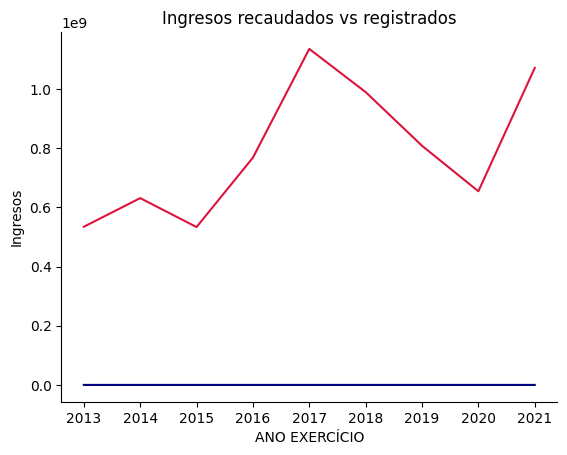

In [101]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_medioambiente, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Trabajo y Empleo (Minist√©rio do Trabalho e Emprego)*

In [102]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio do Trabalho e Emprego")

Los √≥rganos de los que se compone el Minist√©rio do Trabalho e Emprego son: ['Minist√©rio do Trabalho e Emprego - Unidades com v√≠nculo direto']
Las unidades gestoras que componen los √≥rganos del Minist√©rio do Trabalho e Emprego son: ['COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE']
Los ingresos entre 2013 y 2025 del Minist√©rio do Trabalho e Emprego son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                          
Minist√©rio do Trabalho e Emprego          14,328,825,280.00           0.00   

                                   VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                        
Minist√©rio do Trabalho e Emprego 13,484,362,951.59                 94.11   

                                  diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                                       
Minist√©rio do Trabalho e Emprego       13,484,362,951.59

In [103]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_trabajo = fs.info_ministerio(datos_brasil, "Minist√©rio do Trabalho e Emprego")
temporal_trabajo

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00 3,650,207,120.90
2014                    0.00 4,066,697,882.25
2015                    0.00 4,812,646,119.73
2016                    0.00   954,529,170.00
2017                    0.00       282,658.71

In [104]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio do Trabalho e Emprego")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                     
Minist√©rio do Trabalho e Emprego - Unidades com... COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE          14,328,825,280.00   

                                                                                                VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                         
Minist√©rio do Trabalho e Emprego - Unidades com... COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE           0.00   

                                                                                                 VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                            
Minist√©rio do Trabalho e Emprego - Unidades com... COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE 13,484,362,951.59   

                                                                                                porcentaje_recaudacion  
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                 
Minist√©rio do Trabalho e Emprego - Unidades com... COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE                   94.11

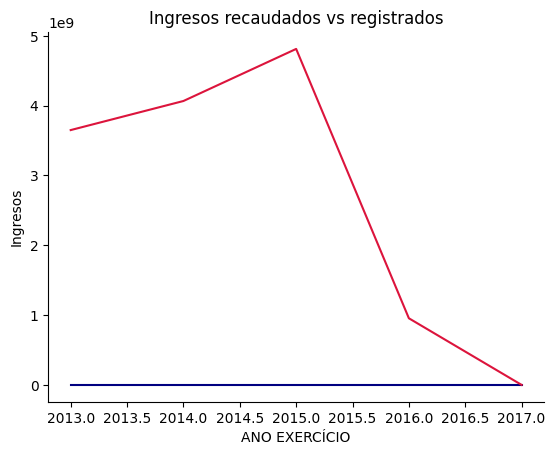

In [105]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_trabajo, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Ministerio de Turismo (Minist√©rio do Turismo)*

In [106]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Minist√©rio do Turismo")

Los √≥rganos de los que se compone el Minist√©rio do Turismo son: ['Funda√ß√£o Casa de Rui Barbosa' 'Instituto Brasileiro de Turismo'
 'Instituto Brasileiro de Museus'
 'Instituto do Patrim√¥nio Hist√≥rico e Art√≠stico Nacional'
 'Funda√ß√£o Nacional de Artes' 'Fundo Nacional de Cultura'
 'Ag√™ncia Nacional do Cinema'
 'Minist√©rio do Turismo - Unidades com v√≠nculo direto'
 'Funda√ß√£o Cultural Palmares' 'Funda√ß√£o Biblioteca Nacional'
 'Fundo Geral de Turismo']
Las unidades gestoras que componen los √≥rganos del Minist√©rio do Turismo son: ['FUNDACAO CASA DE RUI BARBOSA'
 'INSTITUTO BRASILEIRO DE TURISMO - EM EXTINCAO'
 'INSTITUTO BRASILEIRO DE MUSEUS - IBRAM'
 'INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL'
 'FUNDACAO NACIONAL DE ARTES'
 'COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC'
 'AGENCIA NACIONAL DO CINEMA' 'CGOFC - SETORIAL/MTUR'
 'FUNDACAO CULTURAL PALMARES' 'FUNDACAO BIBLIOTECA NACIONAL'
 'FUNDO GERAL DE TURISMO-FUNGETUR' 'FUNDO NACIONAL DA CULTURA - FNC']
Los ingresos entr

VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                               
Minist√©rio do Turismo          13,828,150,327.00  51,866,238.80   

                        VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                             
Minist√©rio do Turismo 13,535,637,878.06                 97.88   

                       diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                            
Minist√©rio do Turismo       13,483,771,639.26

In [107]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_turismo = fs.info_ministerio(datos_brasil, "Minist√©rio do Turismo")
temporal_turismo

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013            8,288,903.28 1,396,181,318.17
2014            2,982,577.28 1,548,958,074.22
2015            5,074,344.78 1,429,566,207.11
2016            5,074,344.78 1,571,548,246.16
2017            5,074,344.78 1,574,835,898.14
2018            5,074,344.78 1,043,110,398.43
2019            5,074,344.78 1,309,053,992.45
2020           10,148,689.56 2,031,843,398.75
2021            5,074,344.78 1,630,540,344.63

In [108]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Minist√©rio do Turismo")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Ag√™ncia Nacional do Cinema                         AGENCIA NACIONAL DO CINEMA                                135,514,150.00   
Funda√ß√£o Biblioteca Nacional                       FUNDACAO BIBLIOTECA NACIONAL                               76,036,480.00   
Funda√ß√£o Casa de Rui Barbosa                       FUNDACAO CASA DE RUI BARBOSA                               27,822,117.00   
Funda√ß√£o Cultural Palmares                         FUNDACAO CULTURAL PALMARES                                 15,611,578.00   
Funda√ß√£o Nacional de Artes                         FUNDACAO NACIONAL DE ARTES                                 70,908,108.00   
Fundo Geral de Turismo                             FUNDO GERAL DE TURISMO-FUNGETUR                           529,385,793.00   
Fundo Nacional de Cultura                          COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC            11,115,674,727.00   
                                                   FUNDO NACIONAL DA CULTURA - FNC                         1,224,817,818.00   
Instituto Brasileiro de Museus                     INSTITUTO BRASILEIRO DE MUSEUS - IBRAM                    132,727,584.00   
Instituto Brasileiro de Turismo                    INSTITUTO BRASILEIRO DE TURISMO - EM EXTINCAO              43,455,625.00   
Instituto do Patrim√¥nio Hist√≥rico e Art√≠stico N... INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL             261,873,089.00   
Minist√©rio do Turismo - Unidades com v√≠nculo di... CGOFC - SETORIAL/MTUR                                     194,323,258.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Ag√™ncia Nacional do Cinema                         AGENCIA NACIONAL DO CINEMA                     51,866,238.80   
Funda√ß√£o Biblioteca Nacional                       FUNDACAO BIBLIOTECA NACIONAL                            0.00   
Funda√ß√£o Casa de Rui Barbosa                       FUNDACAO CASA DE RUI BARBOSA                            0.00   
Funda√ß√£o Cultural Palmares                         FUNDACAO CULTURAL PALMARES                              0.00   
Funda√ß√£o Nacional de Artes                         FUNDACAO NACIONAL DE ARTES                              0.00   
Fundo Geral de Turismo                             FUNDO GERAL DE TURISMO-FUNGETUR                         0.00   
Fundo Nacional de Cultura                          COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC             0.00   
                                                   FUNDO NACIONAL DA CULTURA - FNC                         0.00   
Instituto Brasileiro de Museus                     INSTITUTO BRASILEIRO DE MUSEUS - IBRAM                  0.00   
Instituto Brasileiro de Turismo                    INSTITUTO BRASILEIRO DE TURISMO - EM EXTINCAO           0.00   
Instituto do Patrim√¥nio Hist√≥rico e Art√≠stico N... INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL           0.00   
Minist√©rio do Turismo - Unidades com v√≠nculo di... CGOFC - SETORIAL/MTUR                                   0.00   

                                                                                                  VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                             
Ag√™ncia Nacional do Cinema                         AGENCIA NACIONAL DO CINEMA                       24,034,022.82   
Funda√ß√£o Biblioteca Nacional                       FUNDACAO BIBLIOTECA NACIONAL                     28,361,186.95   
Funda√ß√£o Casa de Rui Barbosa                       FUNDACAO CASA DE RUI BARBOSA                        291,631.42   
Funda√ß√£o Cultural Palmares                         FUNDACAO CULTURAL PALMARES    

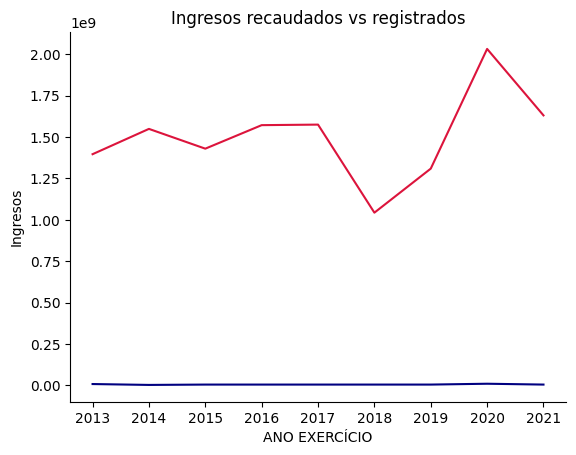

In [109]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_turismo, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])

### *Presidencia de la Rep√∫blica (Presid√™ncia da Rep√∫blica)*

In [110]:
# Vemos la informaci√≥n general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Presid√™ncia da Rep√∫blica")

Los √≥rganos de los que se compone el Presid√™ncia da Rep√∫blica son: ['Presid√™ncia da Rep√∫blica'
 'Secretaria de Pol√≠ticas de Promo√ß√£o da Igualdade Racial'
 'Secretaria de Direitos Humanos' 'Fundo de Imprensa Nacional'
 'Secretaria da Micro e Pequena Empresa'
 'Instituto Nacional de Tecnologia da Informa√ß√£o'
 'Gabinete da Vice-Presid√™ncia da Rep√∫blica' 'Fundo Nacional Antidrogas'
 'Secretaria de Assuntos Estrat√©gicos']
Las unidades gestoras que componen los √≥rganos del Presid√™ncia da Rep√∫blica son: ['SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR'
 'SECRETARIA DE POLIT. DE PROM.DA IGUALD.RACIAL'
 'SECRETARIA DE DIREITOS HUMANOS/PR'
 'FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.'
 'SECRETARIA DA MICRO E PEQUENA EMPRESA'
 'INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI'
 'GABINETE DA VICE-PRESIDENCIA DA REPUBLICA' 'FUNDO NACIONAL ANTIDROGAS'
 'SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR']
Los ingresos entre 2013 y 2025 del Presid√™ncia da Rep√∫blica son: 



VALOR PREVISTO ATUALIZADO  VALOR LAN√áADO  \
NOME √ìRG√ÉO SUPERIOR                                                  
Presid√™ncia da Rep√∫blica          64,130,813,734.00           0.00   

                           VALOR REALIZADO  porcentaje recaudado  \
NOME √ìRG√ÉO SUPERIOR                                                
Presid√™ncia da Rep√∫blica 16,491,839,911.74                 25.72   

                          diferencia_recaudacion  
NOME √ìRG√ÉO SUPERIOR                               
Presid√™ncia da Rep√∫blica       16,491,839,911.74

In [111]:
# Vemos la informaci√≥n temporal sobre el ministerio
temporal_presidencia = fs.info_ministerio(datos_brasil, "Presid√™ncia da Rep√∫blica")
temporal_presidencia

VALOR LAN√áADO  VALOR REALIZADO
ANO EXERC√çCIO                                
2013                    0.00   275,899,186.38
2014                    0.00   675,145,839.57
2015                    0.00   809,080,481.40
2016                    0.00 1,137,344,518.30
2017                    0.00 1,294,520,913.89
2018                    0.00 2,955,882,143.23
2019                    0.00 3,425,405,290.38
2020                    0.00 3,503,410,544.06
2021                    0.00 2,415,150,994.53

In [112]:
# Vemos la informaci√≥n sobre su composici√≥n.
fs.info_ministerio(datos_brasil, "Presid√™ncia da Rep√∫blica")

VALOR PREVISTO ATUALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                                       
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                                           0.00   
Fundo de Imprensa Nacional                         FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.             1,703,410,871.00   
Gabinete da Vice-Presid√™ncia da Rep√∫blica          GABINETE DA VICE-PRESIDENCIA DA REPUBLICA                  12,945,515.00   
Instituto Nacional de Tecnologia da Informa√ß√£o     INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI              27,533,986.00   
Presid√™ncia da Rep√∫blica                           SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR          62,262,221,500.00   
Secretaria da Micro e Pequena Empresa              SECRETARIA DA MICRO E PEQUENA EMPRESA                     124,701,862.00   
Secretaria de Assuntos Estrat√©gicos                SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR                          0.00   
Secretaria de Direitos Humanos                     SECRETARIA DE DIREITOS HUMANOS/PR                                   0.00   
Secretaria de Pol√≠ticas de Promo√ß√£o da Igualdad... SECRETARIA DE POLIT. DE PROM.DA IGUALD.RACIAL                       0.00   

                                                                                                  VALOR LAN√áADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                           
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                               0.00   
Fundo de Imprensa Nacional                         FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.             0.00   
Gabinete da Vice-Presid√™ncia da Rep√∫blica          GABINETE DA VICE-PRESIDENCIA DA REPUBLICA               0.00   
Instituto Nacional de Tecnologia da Informa√ß√£o     INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI           0.00   
Presid√™ncia da Rep√∫blica                           SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR           0.00   
Secretaria da Micro e Pequena Empresa              SECRETARIA DA MICRO E PEQUENA EMPRESA                   0.00   
Secretaria de Assuntos Estrat√©gicos                SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR              0.00   
Secretaria de Direitos Humanos                     SECRETARIA DE DIREITOS HUMANOS/PR                       0.00   
Secretaria de Pol√≠ticas de Promo√ß√£o da Igualdad... SECRETARIA DE POLIT. DE PROM.DA IGUALD.RACIAL           0.00   

                                                                                                   VALOR REALIZADO  \
NOME √ìRG√ÉO                                         NOME UNIDADE GESTORA                                              
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                             93,555.20   
Fundo de Imprensa Nacional                         FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.    1,637,529,811.25   
Gabinete da Vice-Presid√™ncia da Rep√∫blica          GABINETE DA VICE-PRESIDENCIA DA REPUBLICA             25,271.47   
Instituto Nacional de Tecnologia da Informa√ß√£o     INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI      7,946,344.01   
Presid√™ncia da Rep√∫blica                           SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR 14,624,394,871.41   
Secretaria da Micro e Pequena Empresa              SECRETARIA DA MICRO E PEQUENA EMPRESA             97,207,586.50   
Secretaria de Assuntos Estrat√©gicos                SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR            11,540.93   
Secretaria de Direitos Humanos                     SECRETARIA DE DIREITOS HUMANOS/PR                117,514,785.44   
Secretaria de Pol√≠ticas de Promo√ß√£o da Igualdad... SECRETARIA DE POLIT. DE PROM.DA IGUALD.RACIAL      7,116,145.53   

                                                                                                  

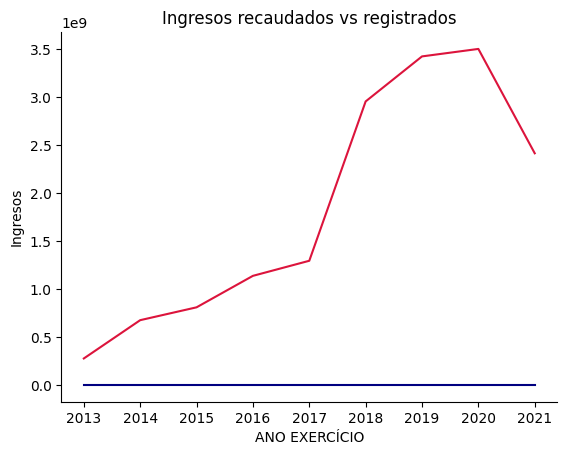

In [113]:
# Graficamos la evoluci√≥n temporal
fs.evolucion_temporal(temporal_presidencia, "ANO EXERC√çCIO",["VALOR LAN√áADO", "VALOR REALIZADO"])